# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

**Team 4** confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

The problem statement reads as follows:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

    

In this section we will import and discuss, the libraries that will be used throughout the analysis and modelling. 

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns

# Libraries for data preparation and model building
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from scipy import stats
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


 In this section we will load the data from the `df_train` file into a DataFrame. 



In [3]:
df = pd.read_csv("df_train.csv")
pd.set_option('display.max_columns', None)
df.head(5) 

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                0.0           1.000000                 0.0       223.333333   
1                0.0           1.000000                 0.0       221.000000   
2                0.0           1.000000                 0.0       214.333333   
3                0.0           1.000000                 0.0       199.666667   
4                2.0           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0             sp25              0.0   
1            3.333333                0.0             sp25              0.0   
2            2.666667                0.0             sp25              0.0   
3            4.000000                0.0             sp25              0.0   
4            3.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4                NaN        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0   

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
In this section, we will perform an in-depth analysis of all the variables in the DataFrame.

We will look at:

-  Numerical and categorical features
-  Features with null values
-  Descriptive analysis 3.4 Distribution and Skewnes
-  Distribution and Skewnes
-  Outliers
-  Correlation and Multicollinearitys

###  3.1 Numerical and categorical features

We will look at the method df.infor. This will provide us with information about the data types of the variables, the number of varibles and the non-null count for each variable.

In [4]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Above we observe that there are features that contain non-numerical values. These are __*Time*, *Valencia_wind_deg*__ and __*Seville_pressure*__. A regression model can only work with only numerical data (int or float). We will convert these features to have numerical information in the Part 4, data engineering.


###  3.2 Null Values

We will also look at the function df.isnull().sum(). This will give us information about which variables have null values.

In [5]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Above we can see that __*Valencia_pressure*__ has 2068 Null values.  We are going to fill the missing values using the "fillna" fuction in the data engineering section. We also are going to remove the *__"Unnamed: 0"__* feature because it is redundant (We do not need it). 

### 3.3 Descriptive analysis

We can observe the description of the dataset by using the method df.describe().

In [6]:
df.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
count        8763.000000         8763.000000      8763.000000   
mean            1.850356           13.714748       158.957511   
std             1.695888           24.272482       102.056299   
min             0.000000            0.000000         0.000000   
25%             0.666667            0.000000        73.333333   
50%             1.000000            0.000000       147.000000   
75%             2.666667           20.000000       234.000000   
max            12.666667           97.333333       359.333333   

       Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
count           8763.000000         8763.000000        8763.000000   
mean               2.870497          190.544848          19.473392   
std                1.792197           89.077337          28.053660   
min                0.000000            0.000000           0.000000   
25%                1.666667          118.166667           0.000000   
50%                2.666667          200.000000           0.000000   
75%                4.000000          260.000000          33.333333   
max               12.666667          360.000000         100.000000   

       Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  \
count         8763.000000        8763.000000      8763.000000     8763.000000   
mean             2.425045           0.128906         0.039439        0.031912   
std              1.672895           0.634730         0.175857        0.557264   
min              0.000000           0.000000         0.000000        0.000000   
25%              1.000000           0.000000         0.000000        0.000000   
50%              2.000000           0.000000         0.000000        0.000000   
75%              3.333333           0.000000         0.000000        0.000000   
max             11.666667          12.000000         3.000000       21.300000   

       Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
count        8.763000e+03      8763.000000     8763.000000        8763.000000   
mean         1.377965e+03         0.000243        0.037818           0.000439   
std          1.407314e+04         0.003660        0.152639           0.003994   
min          6.706667e+02         0.000000        0.000000           0.000000   
25%          1.014000e+03         0.000000        0.000000           0.000000   
50%          1.018000e+03         0.000000        0.000000           0.000000   
75%          1.022000e+03         0.000000        0.000000           0.000000   
max          1.001411e+06         0.093333        3.000000           0.093000   

       Valencia_snow_3h  Madrid_weather_id  Barcelona_weathe

We obsserve  that __*load_shortfall_3h*__ has negative values the lowest being -6618.

We believe that the Load Short Fall is the difference between the power generation through fossil fuel and renewable energy sources. The negative values of the Load Short Fall could mean that the fossil fuel is doing better than renewable energy in generating electricity and positive values could mean that renewable energy is doing well compared to fossil fuel.


Standard deviation is a measure of average distance from the mean. It is used to measure of how dispersed the data is in relation to the mean. We can use coefficient of variation (CV) to measure how spread out values are in a dataset relative to the mean. The CV is a ratio between the standard deviation and the mean. The higher the CV, the higher the standard deviation relative to the mean. In general, a CV value greater than 1 is often considered high.

In [7]:
CV=abs(df.std(axis = 0))/abs(df.mean(axis = 0))


print(CV)

Unnamed: 0               0.577449
Madrid_wind_speed        0.762810
Bilbao_rain_1h           2.761647
Valencia_wind_speed      0.932303
Seville_humidity         0.361022
Madrid_humidity          0.423853
Bilbao_clouds_all        0.748831
Bilbao_wind_speed        0.916520
Seville_clouds_all       1.769809
Bilbao_wind_deg          0.642035
Barcelona_wind_speed     0.624351
Barcelona_wind_deg       0.467488
Madrid_clouds_all        1.440615
Seville_wind_speed       0.689841
Barcelona_rain_1h        4.923986
Seville_rain_1h          4.459006
Bilbao_snow_3h          17.462507
Barcelona_pressure      10.212992
Seville_rain_3h         15.088844
Madrid_rain_1h           4.036128
Barcelona_rain_3h        9.088357
Valencia_snow_3h        57.766503
Madrid_weather_id        0.099949
Barcelona_weather_id     0.115071
Bilbao_pressure          0.009871
Seville_weather_id       0.092867
Valencia_pressure        0.009393
Seville_temp_max         0.029837
Madrid_pressure          0.021972
Valencia_temp_

<ipython-input-7-219a6e38d00d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CV=abs(df.std(axis = 0))/abs(df.mean(axis = 0))


From the calculation of the CV. We observe that the following variables have high CVs. This means that these variables have a greater level of dispersion around the mean. They are less reliable.

-  Bilbao_rain_1h           
-  Seville_clouds_all       
-  Madrid_clouds_all        
-  Barcelona_rain_1h
-  Seville_rain_1h
-  Bilbao_snow_3h
-  Barcelona_pressure
-  Seville_rain_3h
-  Valencia_snow_3h

The highest CV is from the feature Valencia_snow_3h with a CV of 58. Bilbao_snow_3h has the second highest CV with 17.

### 3.4 Distribution and Skewness

Skewed data means that there is a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution. If our data is too skewed, then our model may not work because the tail region may act as outlier of the statistical model. It will be necessary to transform the skewed data to a close enough normal distribution for our model to work.


If the skewness is between -0.5 and 0.5, the data is fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data is moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.


In [8]:
#skewness
df.skew()

<ipython-input-8-ca90bfe58b72>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

The following variables have skewness values that are great and less than 1. The distributions of the following these variables are highly skewed.

- Madrid_wind_speed      
- Bilbao_rain_1h           
- Valencia_wind_speed      
- Bilbao_wind_speed        
- Seville_clouds_all       
- Barcelona_wind_speed     
- Madrid_clouds_all        
- Seville_wind_speed       
- Barcelona_rain_1h        
- Seville_rain_1h          
- Bilbao_snow_3h          
- Barcelona_pressure      
- Seville_rain_3h         
- Madrid_rain_1h           
- Barcelona_rain_3h       
- Valencia_snow_3h        
- Madrid_weather_id       
- Barcelona_weather_id    
- Seville_weather_id      
- Valencia_pressure       
- Madrid_pressure         
- Bilbao_weather_id   

*__Histogram plots__*


We can observe the distributions of the variables by looking at their respective histograms and barplots. We can detect the skewness of the variables with these plots.

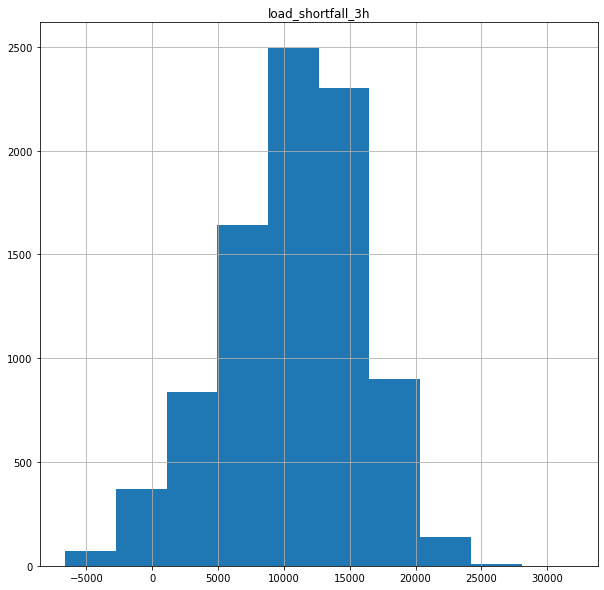

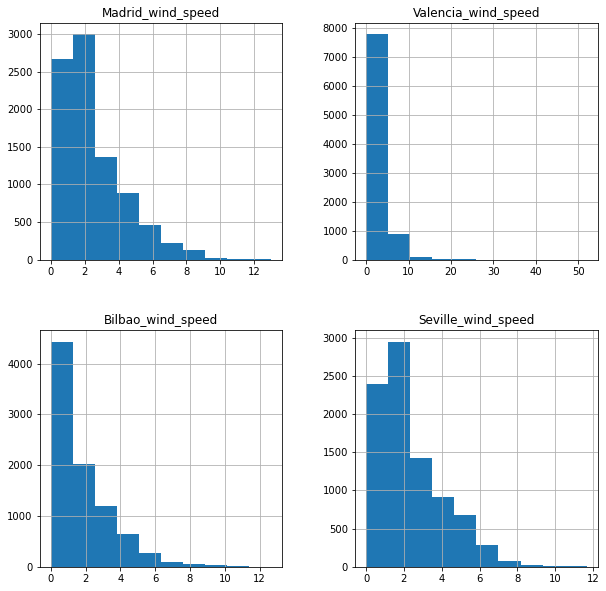

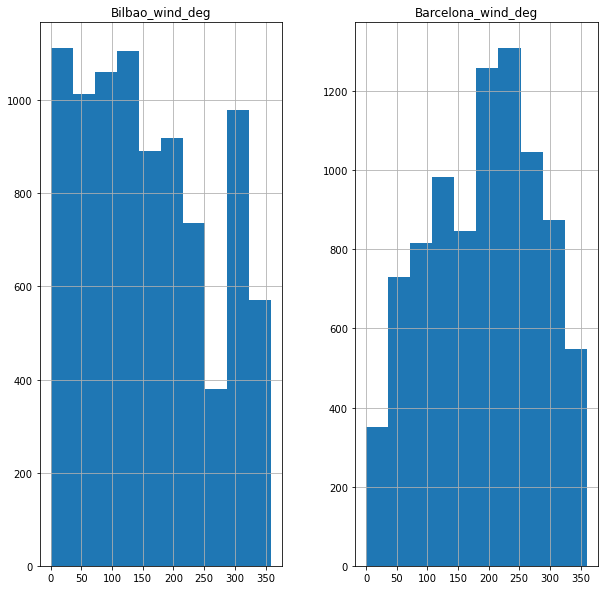

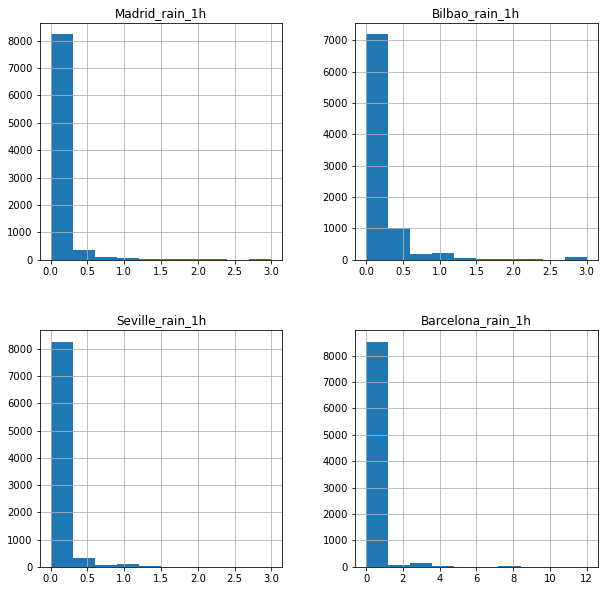

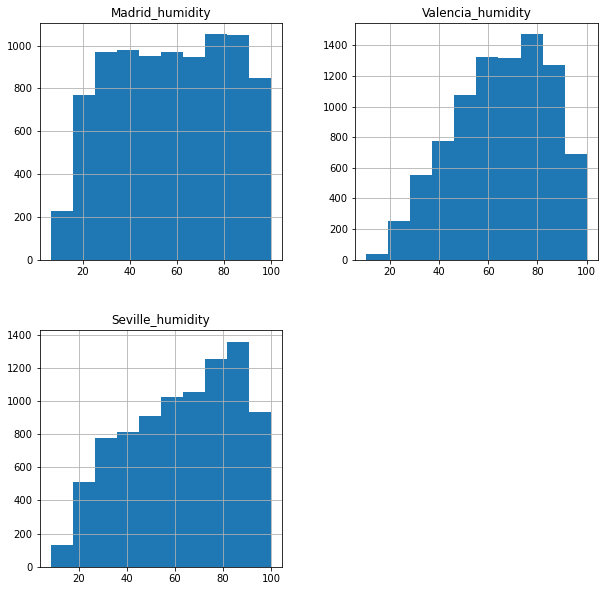

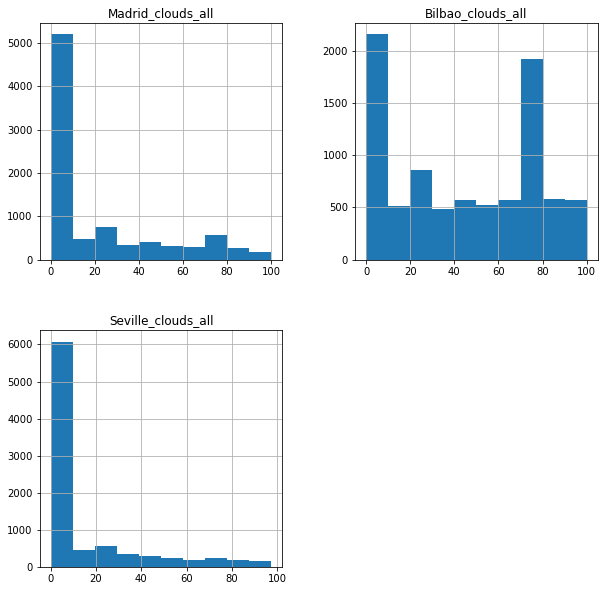

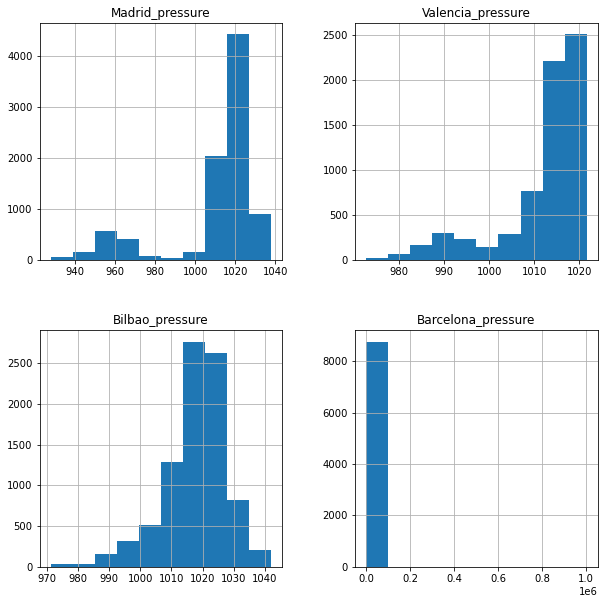

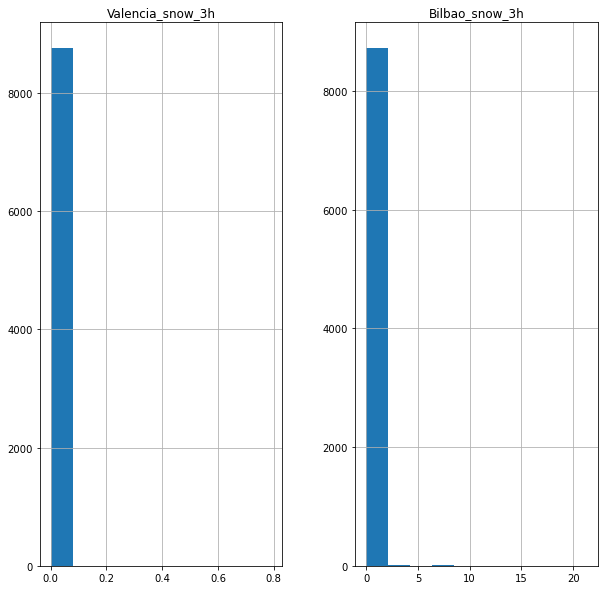

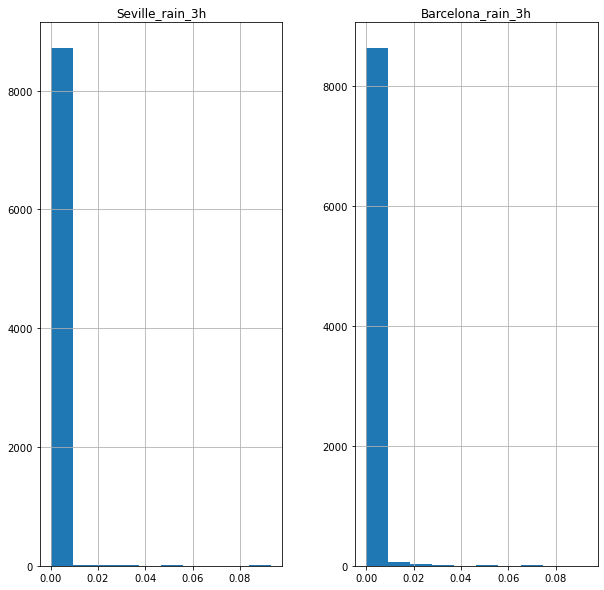

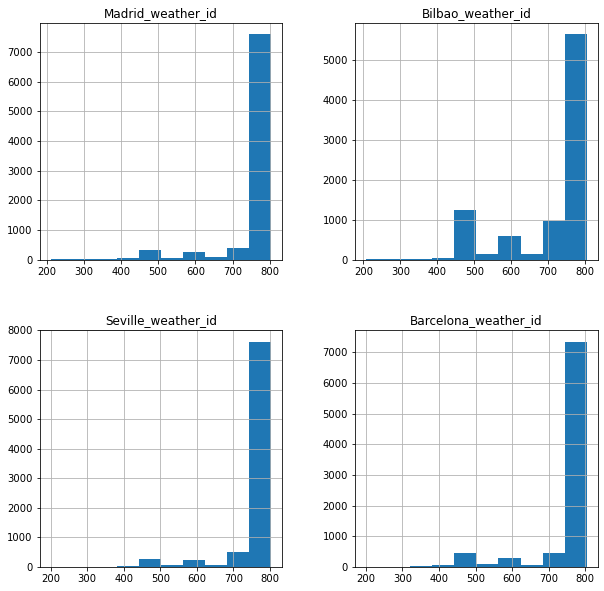

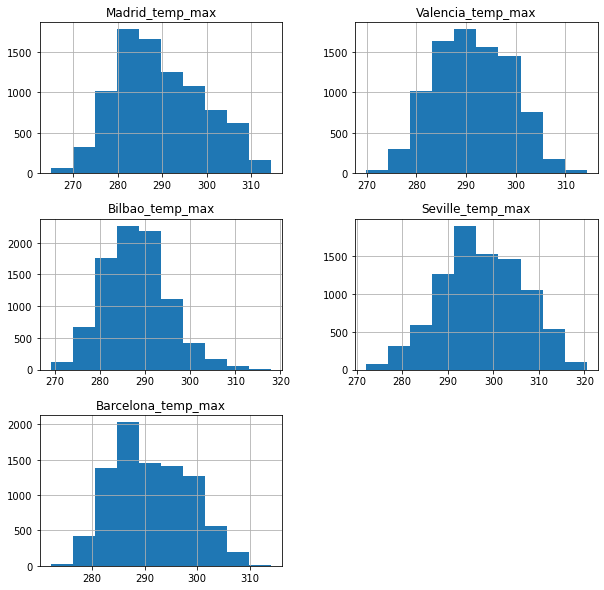

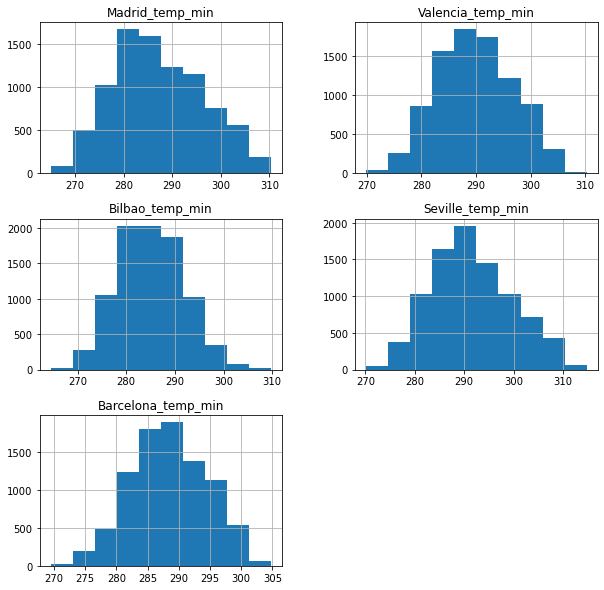

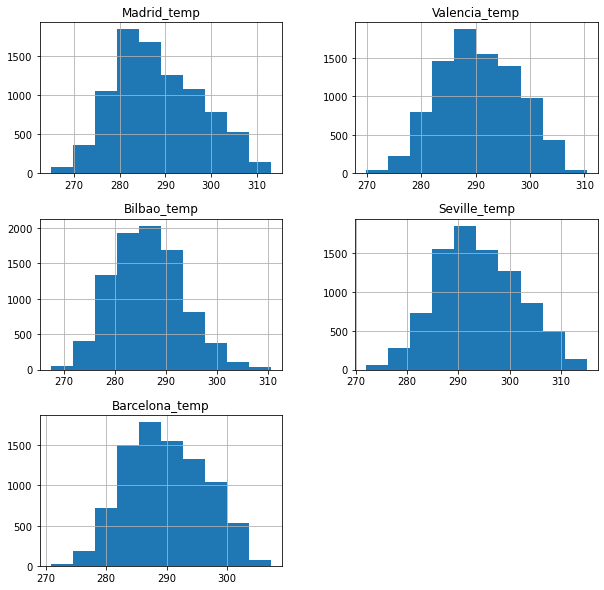

In [9]:
#histograms for Numerical data

#dependent variable
features_load_shortfall_3h = ['load_shortfall_3h']  # create a histogram for the y variable 
df[features_load_shortfall_3h].hist(figsize=(10,10), bins=10);

# wind speed
features_wind_speed = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);
    
                             
# wind degrees
features_wind_speed = ['Bilbao_wind_deg', 'Barcelona_wind_deg'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);                             
                      
                             
#rain_1hr
features_rain_1h = ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] # create a list of all numerical features (rain_1h)
df[features_rain_1h].hist(figsize=(10,10), bins=10);   
                             
                          
#humidity
features_humidity = ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] # create a list of all numerical features (humidity)
df[features_humidity].hist(figsize=(10,10));
                                                         

#clouds
features_clouds_all = ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#pressure
features_clouds_all = ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#snow_3h
features_clouds_all = ['Valencia_snow_3h', 'Bilbao_snow_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));

#rain_3h
features_clouds_all = ['Seville_rain_3h', 'Barcelona_rain_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#weather_id
features_clouds_all = ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#temp_max                             
features_temp_max = ['Madrid_temp_max', 'Valencia_temp_max', 'Bilbao_temp_max', 'Seville_temp_max', 'Barcelona_temp_max'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);

#temp_max                             
features_temp_max = ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);                          
                     
#temp                            
features_temp_max = ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);
                             

We can observe from the graphs above that the following variables have  0.0 values (skewed to the left)
- Barcelona_pressure
- Valencia_snow_3h
- Bilbao_snow_3h
- Seville_rain_3h

The following variables have alot of 0.0 value (skewed to the left)
- Seville_rain_1h','Barcelona_rain_1h
- Seville_rain_1h','Barcelona_rain_1h

<AxesSubplot:xlabel='Seville_pressure', ylabel='count'>

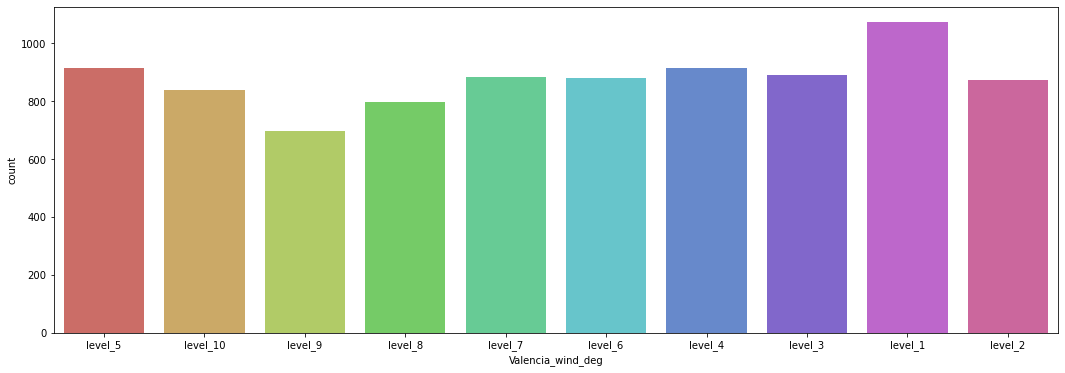

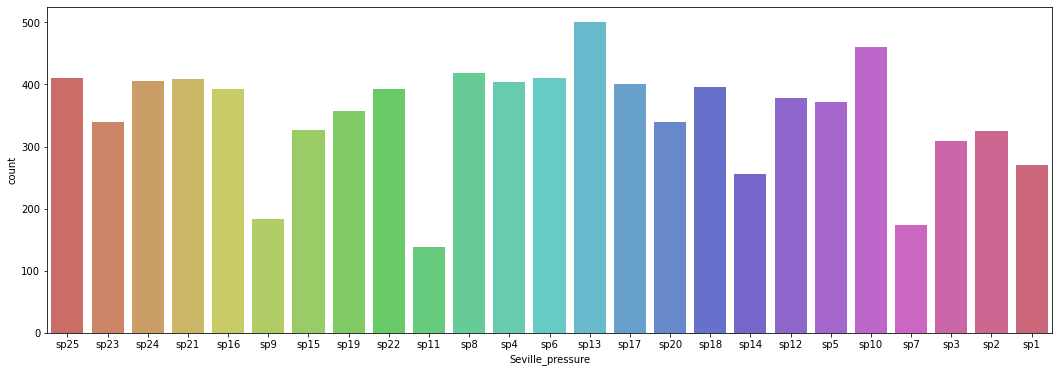

In [10]:
#categorical bar plots

#wind_deg
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")

#Seville_pressure
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Seville_pressure', data = df, palette="hls")

### 3.5 Outliers

Kurtosis can be used to detect outliers. We expect a kurtosis value to be between [3,-3]. If the number is greater than 3 it means there is a huge number of outliers.


In [11]:
#kurtosis
df.kurtosis()

<ipython-input-11-c1a853d8d8fd>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

From the ananlysis above we can observe that the following variables have a kurtosis value larger than 3.

- Bilbao_rain_1h            
- Valencia_wind_speed       
- Bilbao_wind_speed          
- Barcelona_rain_1h        
- Seville_rain_1h           
- Bilbao_snow_3h           
- Barcelona_pressure      
- Seville_rain_3h          
- Madrid_rain_1h            
- Barcelona_rain_3h        
- Valencia_snow_3h        
- Madrid_weather_id          
- Barcelona_weather_id       
- Seville_weather_id        
- Valencia_pressure          

*__Boxplots__*

We can use the boxplot and scatter plot to graphically see if we have and outliers in our data.If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes.

The black dots in the graphs below represent the outliers for each of the variables.

<AxesSubplot:>

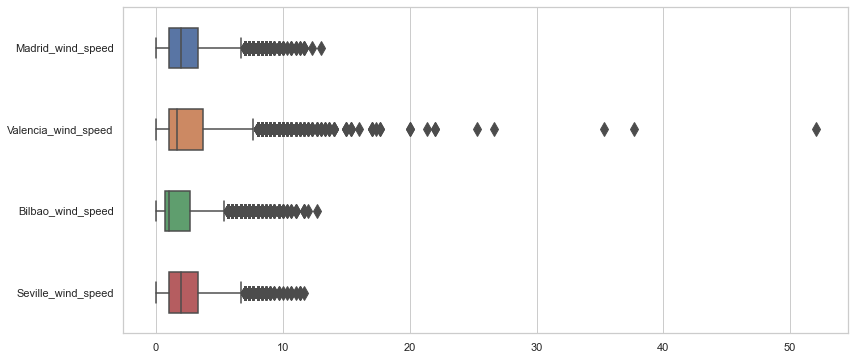

In [12]:
#wind speed
selected_columns = df[ [ 'Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed' ] ]
df_wind_speed = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_speed,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

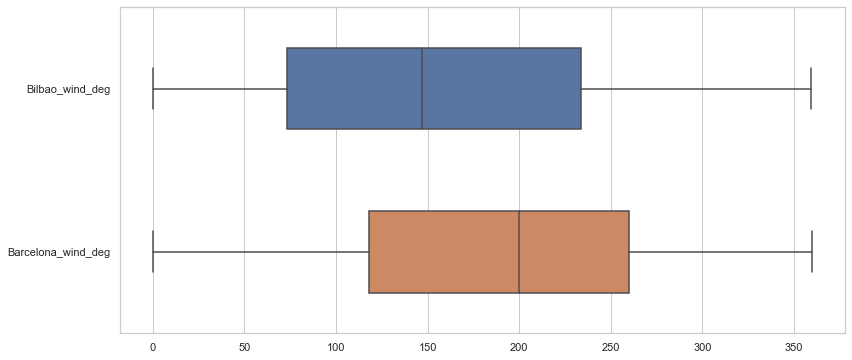

In [13]:
#wind speed
selected_columns = df[ [ 'Bilbao_wind_deg', 'Barcelona_wind_deg'] ]
df_wind_deg = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_deg,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

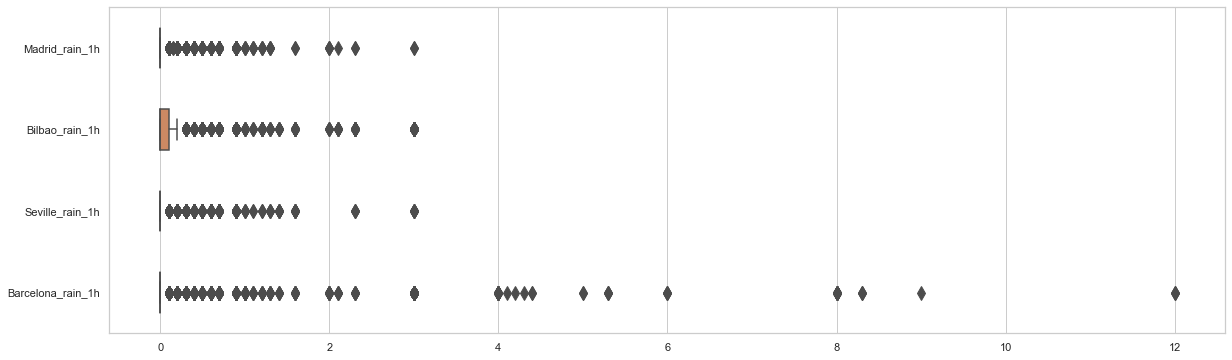

In [14]:
#rain_1h
selected_columns = df[ ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] ]
df_rain_1h = selected_columns.copy() 



sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(20,6))
sns.boxplot(data=df_rain_1h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

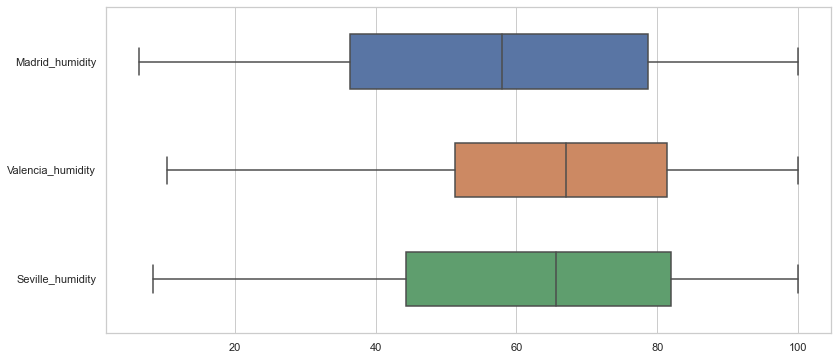

In [15]:
#humidity
selected_columns = df[ ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] ]
df_humidity = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_humidity,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

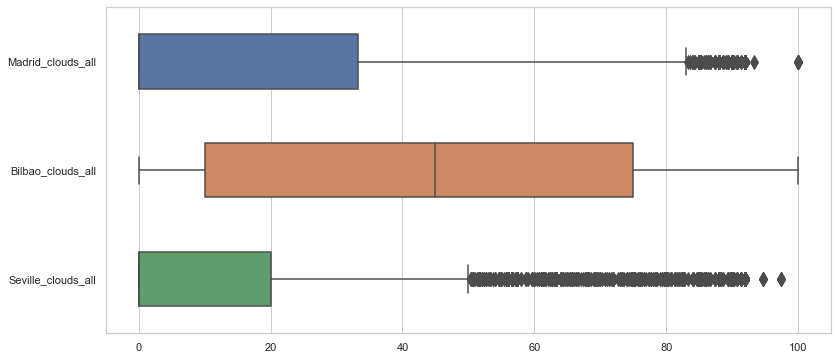

In [16]:
#clouds_all
selected_columns = df[ ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] ]
df_clouds_all = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_clouds_all,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

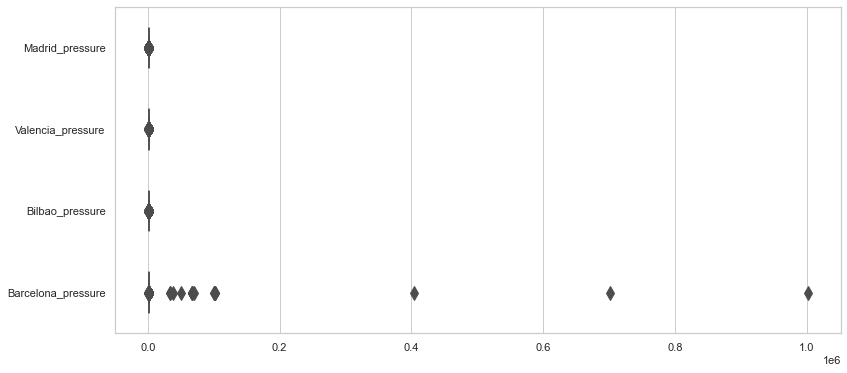

In [17]:
#pressure
selected_columns = df[ ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] ]
df_pressure = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_pressure,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

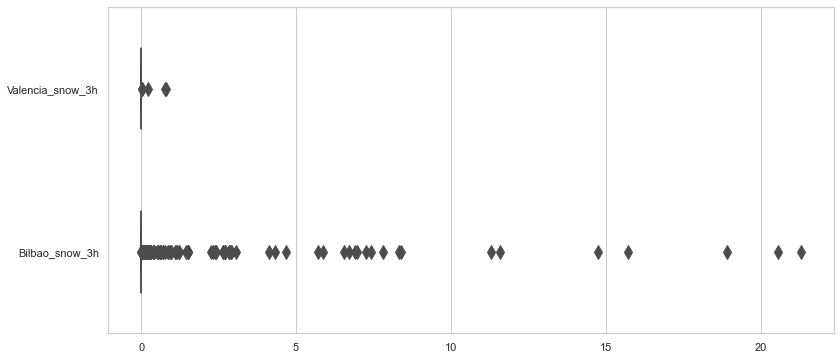

In [18]:
#snow_3h
selected_columns = df[ ['Valencia_snow_3h', 'Bilbao_snow_3h'] ]
df_snow_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_snow_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

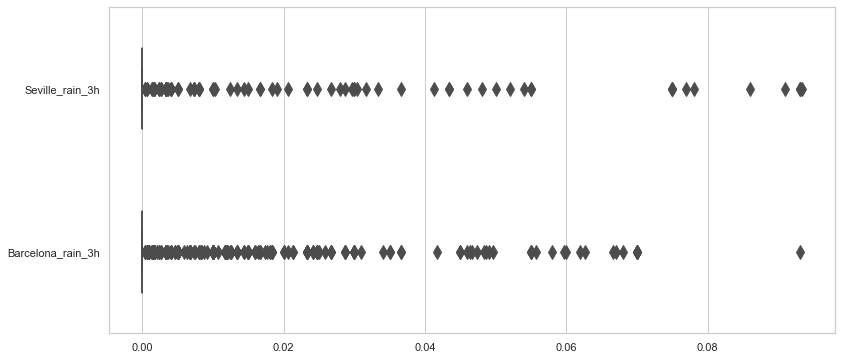

In [19]:
#rain_3h
selected_columns = df[ ['Seville_rain_3h', 'Barcelona_rain_3h' ]]
df_rain_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_rain_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

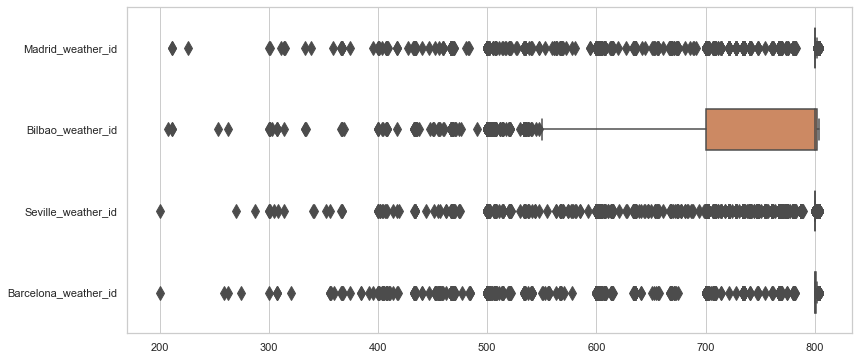

In [20]:
#weather_id
selected_columns = df[ ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id' ]]
df_weather_id = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_weather_id,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

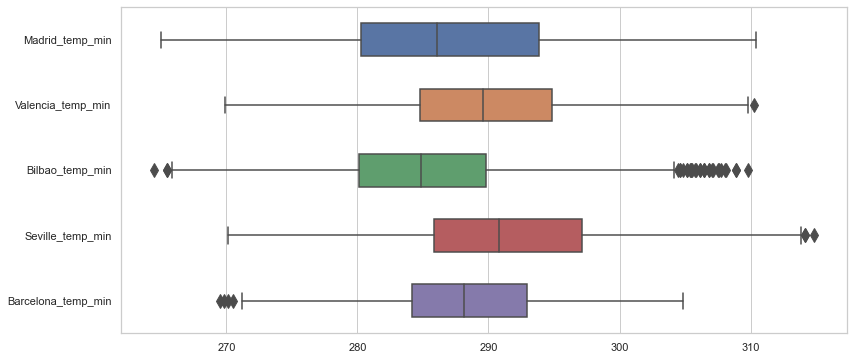

In [21]:
#temp_min
selected_columns = df[ ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min']]
df_temp_min = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp_min,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

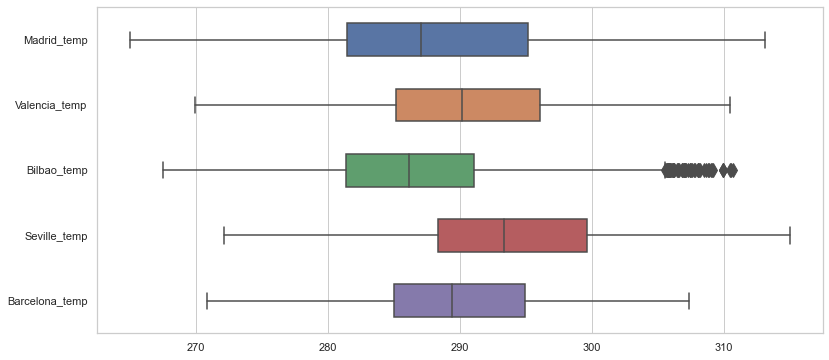

In [22]:
#temp
selected_columns = df[ ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp']]
df_temp = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp,orient="h",width=0.5, fliersize=10)

We will standardise the data set in the data engineering, while this will not eliminate outliers it will consider them in a more conservative manner.

### 3.6 Correlation and Multicollinearity

We would expect for individual feature to have a strong correlation with the response variable. These will show that the feature and the response variable have a relationship.

Below we plot relevant feature interactions

C:\Users\u1121\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='Barcelona_temp', ylabel='load_shortfall_3h'>

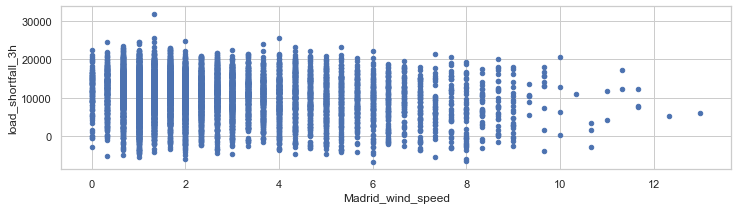

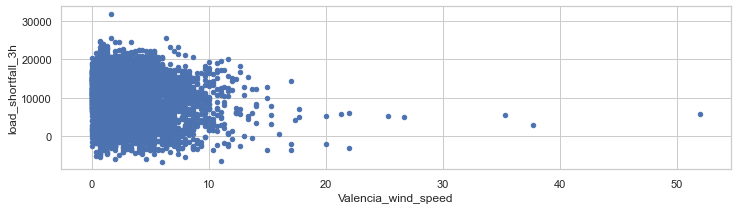

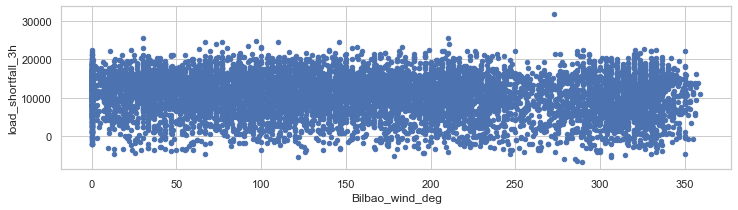

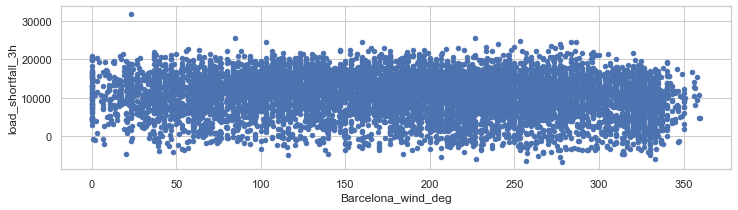

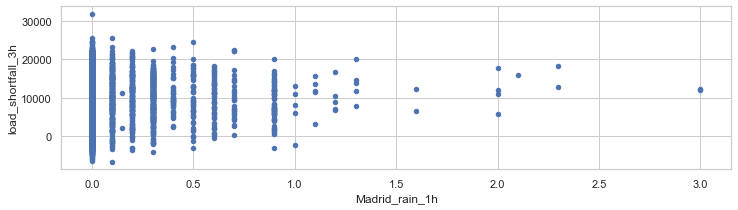

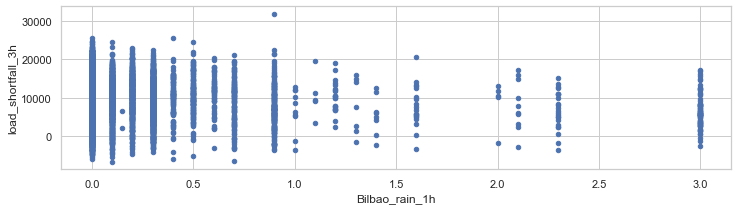

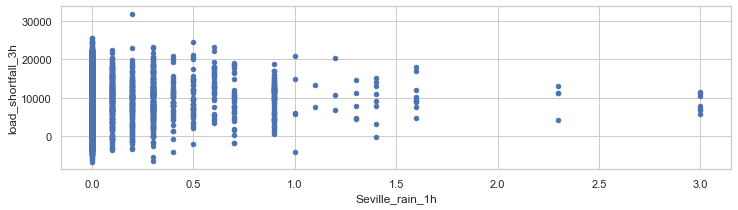

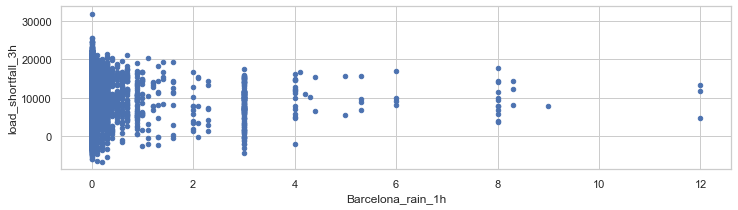

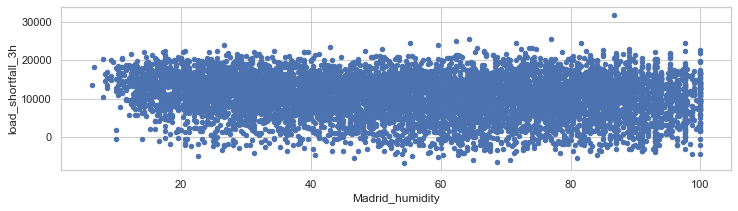

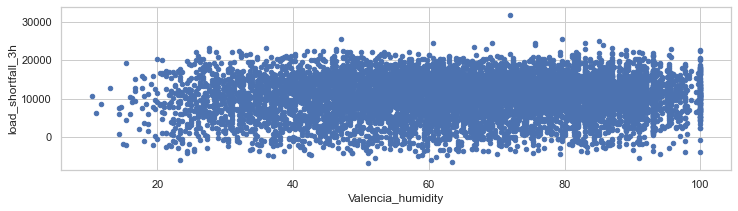

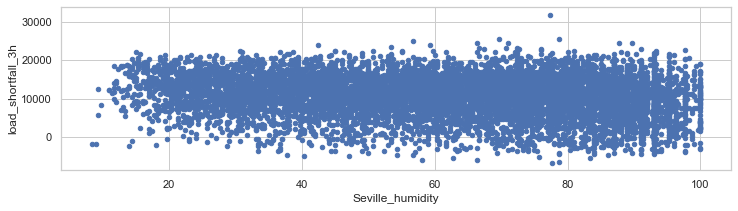

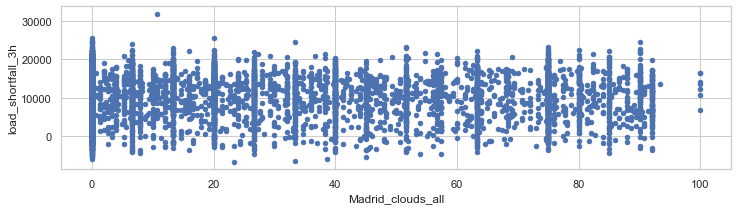

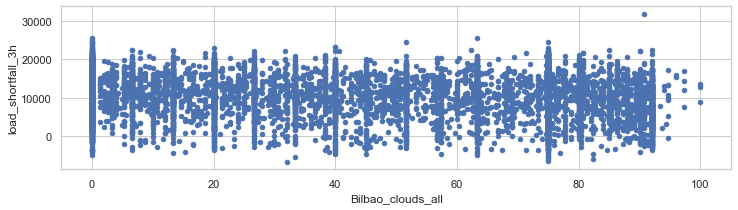

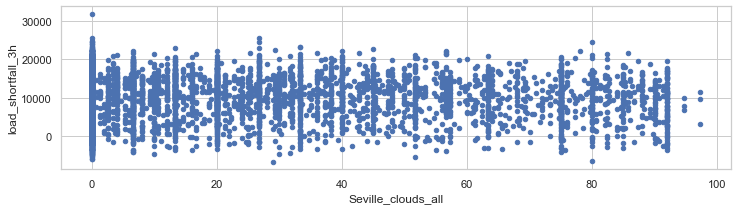

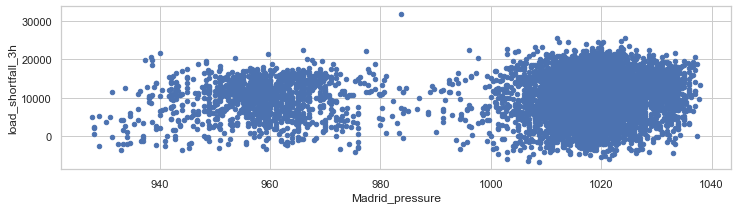

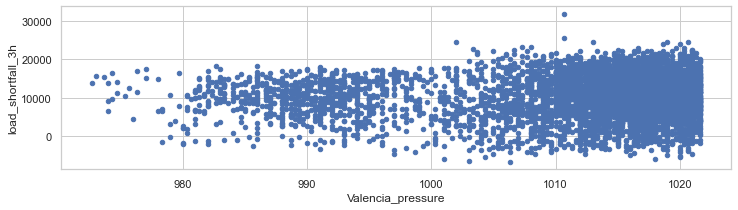

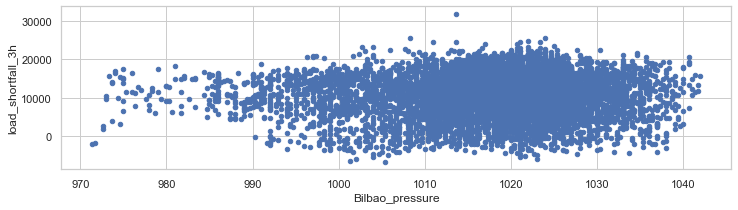

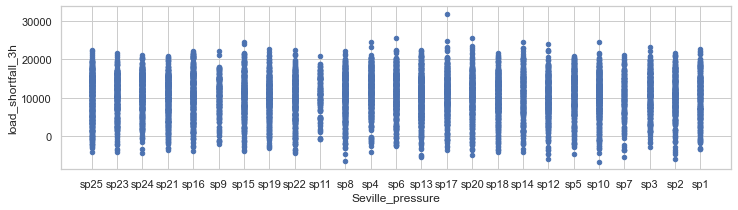

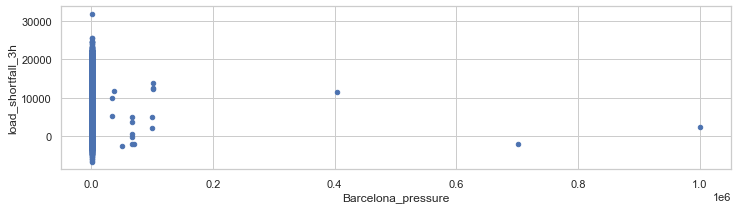

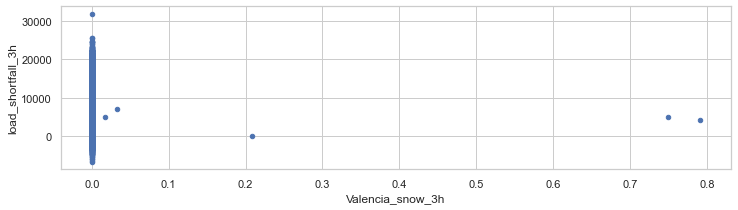

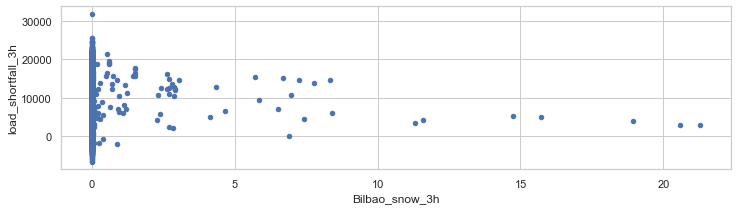

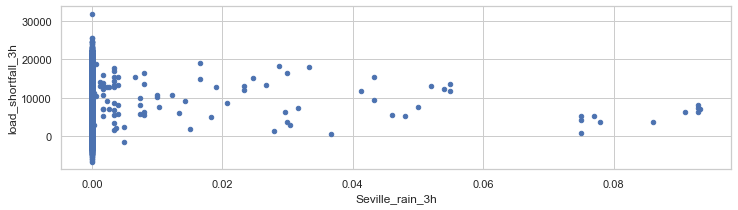

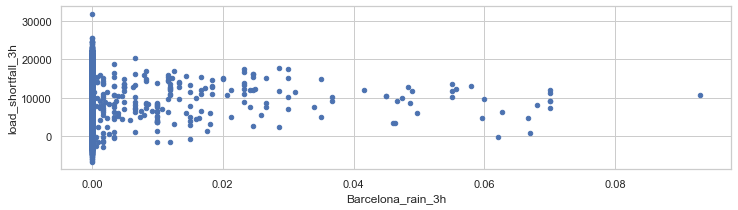

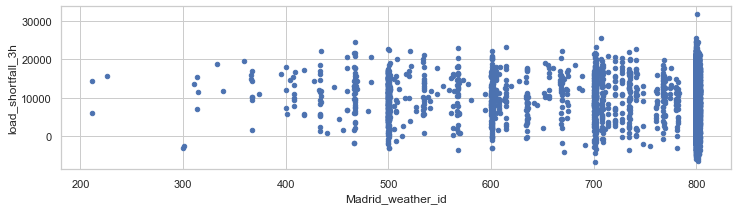

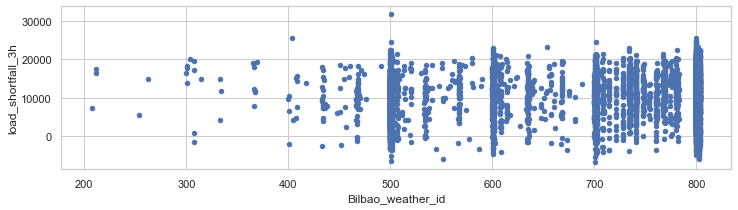

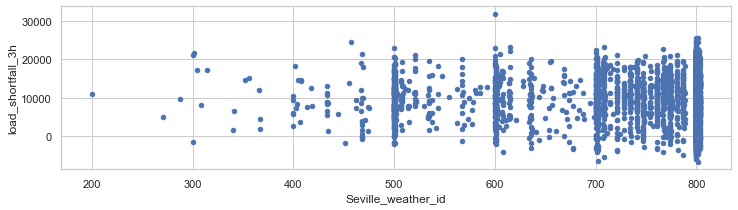

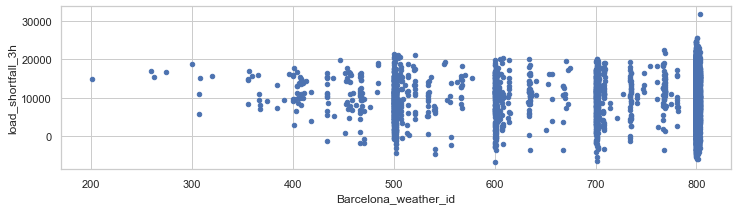

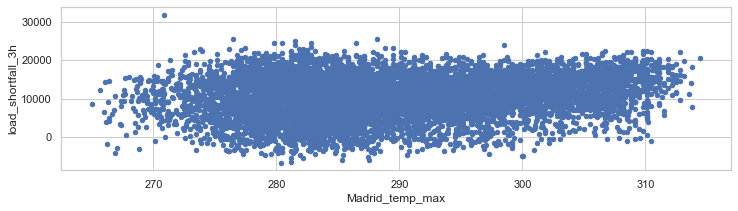

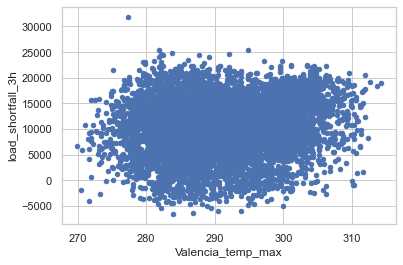

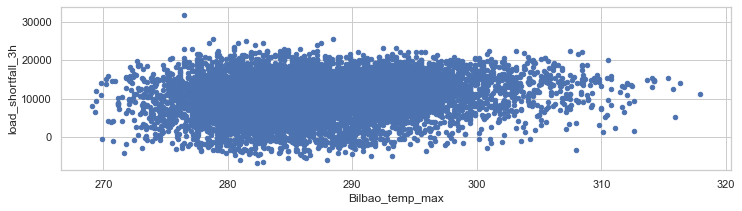

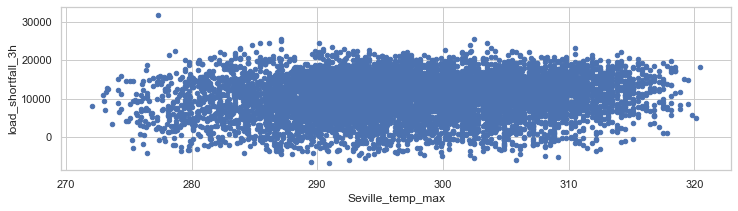

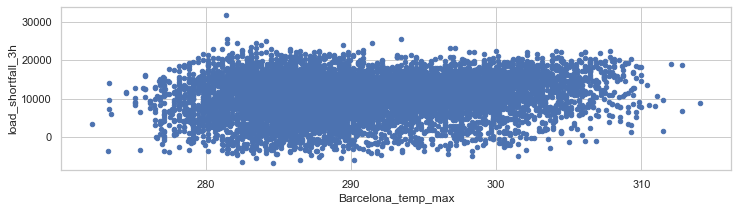

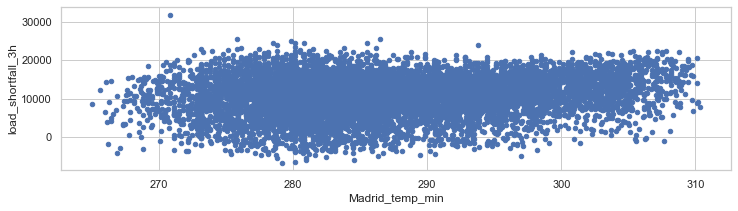

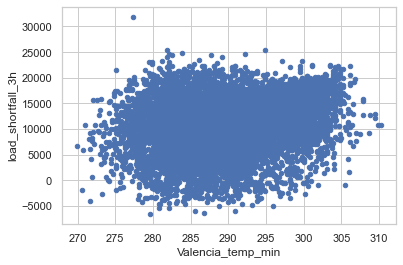

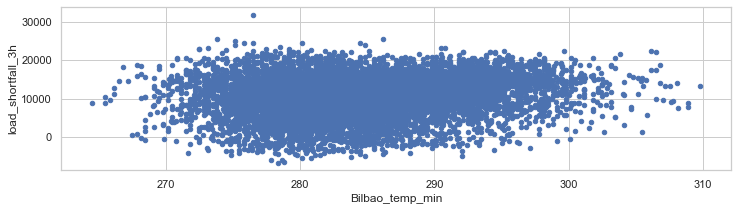

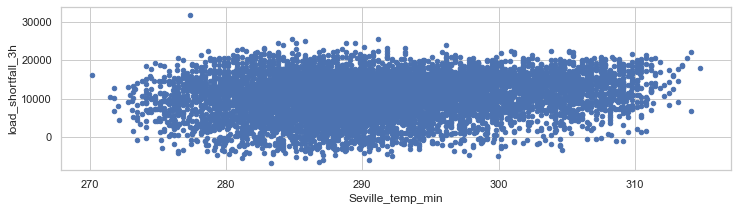

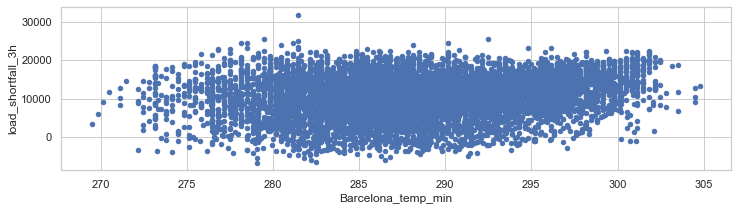

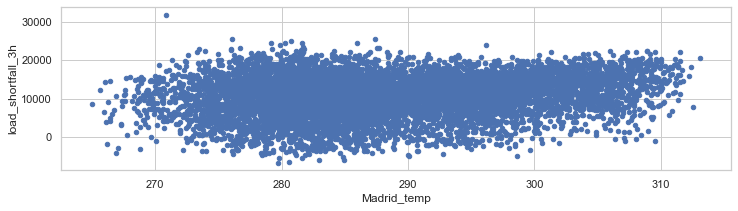

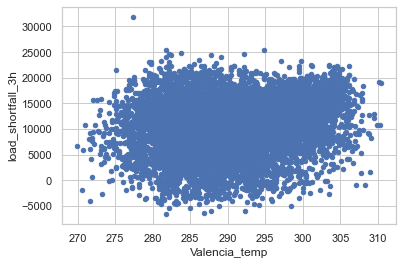

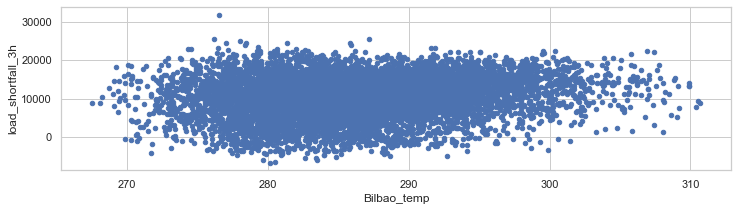

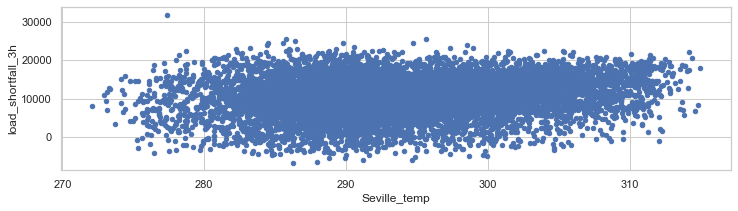

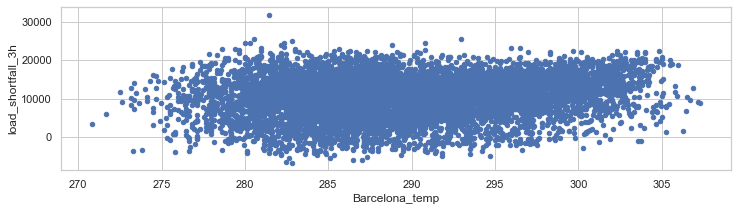

In [23]:

# wind speed
df.plot.scatter(x='Madrid_wind_speed',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_wind_speed',y='load_shortfall_3h', figsize=(12, 3))

# wind degrees
df.plot.scatter(x='Bilbao_wind_deg',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_wind_deg',y='load_shortfall_3h', figsize=(12, 3))

#rain
df.plot.scatter(x='Madrid_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_1h',y='load_shortfall_3h', figsize=(12, 3))

#humidity

df.plot.scatter(x='Madrid_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_humidity',y='load_shortfall_3h', figsize=(12, 3))

#clouds
df.plot.scatter(x='Madrid_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_clouds_all',y='load_shortfall_3h', figsize=(12, 3))


#pressure
df.plot.scatter(x='Madrid_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_pressure',y='load_shortfall_3h', figsize=(12, 3))

#snow_3h
df.plot.scatter(x='Valencia_snow_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_snow_3h',y='load_shortfall_3h', figsize=(12, 3))

#rain_3h
df.plot.scatter(x='Seville_rain_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_3h',y='load_shortfall_3h', figsize=(12, 3))

#weather_id
df.plot.scatter(x='Madrid_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_weather_id',y='load_shortfall_3h', figsize=(12, 3))

#temp_max
df.plot.scatter(x='Madrid_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_max',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_max',y='load_shortfall_3h', figsize=(12, 3))

#temp_min
df.plot.scatter(x='Madrid_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_min',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_min',y='load_shortfall_3h', figsize=(12, 3))

#temp
df.plot.scatter(x='Madrid_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp',y='load_shortfall_3h', figsize=(12, 3))

We observe no clear negative or positive correclation with regards to the features and load shortfall

In [24]:
# evaluate correlation
df.corr()


Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Unnamed: 0              1.000000          -0.109288       -0.249633   
Madrid_wind_speed      -0.109288           1.000000        0.259719   
Bilbao_rain_1h         -0.249633           0.259719        1.000000   
Valencia_wind_speed    -0.090161           0.513092        0.265864   
Seville_humidity       -0.079025          -0.117892        0.069878   
Madrid_humidity        -0.103359          -0.137092        0.106765   
Bilbao_clouds_all      -0.068123           0.244001        0.370733   
Bilbao_wind_speed       0.049197           0.377854        0.085398   
Seville_clouds_all     -0.140583           0.191251        0.081131   
Bilbao_wind_deg        -0.155738           0.270950        0.279350   
Barcelona_wind_speed   -0.218781           0.294640        0.069997   
Barcelona_wind_deg     -0.140449          -0.095380       -0.030723   
Madrid_clouds_all      -0.116928           0.230126        0.135524   
Seville_wind_speed     -0.093926           0.434104        0.140101   
Barcelona_rain_1h      -0.075692           0.062758        0.052558   
Seville_rain_1h        -0.075340           0.108413        0.092984   
Bilbao_snow_3h         -0.092377           0.071183        0.096730   
Barcelona_pressure     -0.040157           0.011134        0.052458   
Seville_rain_3h        -0.082525           0.004795        0.016392   
Madrid_rain_1h         -0.068980           0.150446        0.187423   
Barcelona_rain_3h      -0.104326          -0.014644       -0.001412   
Valencia_snow_3h       -0.028130           0.021660        0.008269   
Madrid_weather_id       0.047202          -0.169358       -0.147768   
Barcelona_weather_id    0.034761          -0.099582       -0.120618   
Bilbao_pressure        -0.022475          -0.231747       -0.054814   
Seville_weather_id      0.072472          -0.120014       -0.095723   
Valencia_pressure       0.267772          -0.157088       -0.206765   
Seville_temp_max        0.039424           0.050043       -0.210323   
Madrid_pressure         0.385578          -0.136672       -0.298587   
Valencia_temp_max       0.087002           0.133468       -0.135198   
Valencia_temp           0.135294           0.128726       -0.127953   
Bilbao_weather_id       0.192485          -0.238128       -0.604616   
Seville_temp            0.042897           0.090861       -0.170009   
Valencia_humidity       0.023917          -0.285787       -0.103868   
Valencia_temp_min       0.185468           0.119657       -0.116835   
Barcelona_temp_max      0.047417           0.061854       -0.157326   
Madrid_temp_max         0.093378           0.091464       -0.148397   
Barcelona_temp          0.068078           0.080133       -0.138901   
Bilbao_temp_min         0.028698           0.077330       -0.141269   
Bilbao_temp             0.081799           0.060467       -0.182494   
Barcelona_temp_min      0.103436           0.089992       -0.106593   
Bilbao_temp_max         0.146216           0.042114       -0.219871   
Seville_temp_min        0.037487           0.110278       -0.120575   
Madrid_temp             0.088439           0.109572       -0.135927   
Madrid_temp_min         0.085197           0.098138       -0.116431   
load_shortfall_3h       0.192612          -0.150981       -0.152510   

                      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Unnamed: 0                      -0.090161         -0.079025        -0.103359   
Madrid_wind_speed                0.513092         -0.117892        -0.137092   
Bilbao_rain_1h                   0.265864          0.069878         0.106765   
Valencia_wind_speed              1.000000         -0.075227        -0.019388   
Seville_humidity                -0.075227          1.000000         0.799831   
Madrid_humidity                 -0.019388          0.799831         1.000000   
Bilbao_clouds_all                0.210524          0.061680         0.041878   
Bilbao_wind_speed                0.386478   

The following features are positively correclated with load_shortfall_3h
 - Madrid_wind_speed
 - Bilbao_rain_1h
 - Valencia_wind_speed
 - Seville_humidity
 - Madrid_humidity
 - Madrid_humidity
 - Bilbao_clouds_all
 - Bilbao_wind_speed
 - Seville_clouds_all
 - Bilbao_wind_deg
 - Barcelona_wind_speed
 - Barcelona_wind_deg
 - Madrid_clouds_all
 - Seville_wind_speed
 - Barcelona_rain_1h
 - Bilbao_snow_3h
 - Barcelona_pressure
 - Seville_rain_3h
 - Madrid_rain_1h
 - Barcelona_rain_3h
 - Valencia_snow_3h


The following features are negatively correclated with load_shortfall_3h

 
- Madrid_weather_id
- Barcelona_weather_id
- Bilbao_pressure
- Seville_weather_id
- Valencia_pressure
- Seville_temp_max
- Madrid_pressure
- Valencia_temp_max
- Valencia_temp
- Bilbao_weather_id
- Seville_temp
- Valencia_humidity
- Barcelona_temp_max
- Madrid_temp_max
- Barcelona_temp
- Bilbao_temp_min
- Bilbao_temp
- Barcelona_temp_min
- Bilbao_temp_max
- Seville_temp_min
- Madrid_temp
- Madrid_temp_min

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section we will clean the dataset and engineer the features, as identified in the EDA phase. 

We will look at:

- Updating the categorical features (time,Valencia_wind_deg and Seville_pressure)
- Removing missing values
- Scaling and Standardisation
- Variable selection using correlation
- Preparing the test dataset

### 4.1 Updating the categorical features

*__Time__*

In [25]:
#changing the time column from 'object' dtype to 'date'

df['time'] = pd.to_datetime(df['time'])

df["time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8763 entries, 0 to 8762
Series name: time
Non-Null Count  Dtype         
--------------  -----         
8763 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


In order to model time we need to convert it to intergers.

In [26]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

In [27]:
df.head(2)

Unnamed: 0                time  Madrid_wind_speed Valencia_wind_deg  \
0           0 2015-01-01 03:00:00           0.666667           level_5   
1           1 2015-01-01 06:00:00           0.333333          level_10   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                0.0                1.0                 0.0       223.333333   
1                0.0                1.0                 0.0       221.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0             sp25              0.0   
1            3.333333                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.728333              800.0    274.945000          71.000000   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0         269.888000          281.013000       265.938000      281.013000   
1         271.728333          280.561667       266.386667      280.561667   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  year  \
0        274.254667   265.938000       265.938000        6715.666667  2015   
1        274.945000   266.386667       266.386667        4171.666667  2015   

   month  day  hour  minute  second  
0      1    1     3       0       0  
1      1    1     6       0       0

We also nee to change the categorical variables to numerical variables.


*__Valencia_wind_deg__*

In [28]:
df['Valencia_wind_deg']=df['Valencia_wind_deg'].str.extract('(\d+)')
df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])
df['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

*__Seville_pressure__*

In [29]:
df['Seville_pressure']=df['Seville_pressure'].str.extract('(\d+)')
df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])
df['Seville_pressure'] 

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

### 4.2 Missing Values


We will replace the __Valencia_pressure__ missing values with the mean and then remove the columns, __Valencia_snow_3h__, __Bilbao_snow_3h__, __Seville_rain_3h__, and __Barcelona_rain_3h__ because they have only zero values.

In [30]:
# remove missing values/ features

#Filling missing value with the mean
df_clean = df.fillna(value=df['Valencia_pressure'].mean())
#removing the unnamed column
df_clean.drop('Unnamed: 0', inplace =True, axis=1)

#dropping column that have only zero values
df_clean.drop(columns =['Valencia_snow_3h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h'], inplace= True)

df_clean.head(2)


time  Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
0 2015-01-01 03:00:00           0.666667                  5             0.0   
1 2015-01-01 06:00:00           0.333333                 10             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                1.0                 0.0       223.333333   
1                1.0                 0.0       221.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0                25              0.0   
1            3.333333                0.0                25              0.0   

   Barcelona_pressure  Madrid_rain_1h  Madrid_weather_id  \
0         1036.333333             0.0              800.0   
1         1037.333333             0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.728333              800.0    274.945000          71.000000   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0         269.888000          281.013000       265.938000      281.013000   
1         271.728333          280.561667       266.386667      280.561667   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  year  \
0        274.254667   265.938000       265.938000        6715.666667  2015   
1        274.945000   266.386667       266.386667        4171.666667  2015   

   month  day  hour  minute  second  
0      1    1     3       0       0  
1      1    1     6       0       0

There are now no variables with missing data

In [31]:
df_clean.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Barcelona_pressure      0
Madrid_rain_1h          0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_temp          0
Bilbao_temp_min         0
Bilbao_temp             0
Barcelona_te

### 4.3 Scaling and Standardisation

Z-score standardisation handles outliers gracefully. Z-score standardisation is implemented by applying the following operation to each of our values

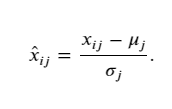

where μj represents the mean of variable xj and σj is the variable's standard deviation

Standardisation divides by a  distribution-aware measure, the standard deviation. While this doesn't completely remove the effects of outliers, it does consider them in a more conservative manner. 


In [32]:
# split predictors and response and time
X = df_clean.drop(['load_shortfall_3h','time'], axis=1)
y = df_clean['load_shortfall_3h']

X.head(2)

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                  5             0.0             0.666667   
1           0.333333                 10             0.0             1.666667   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0                1.0   
1         78.333333        64.666667                0.0                1.0   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0                 0.0       223.333333              6.333333   
1                 0.0       221.000000              4.000000   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           42.666667                0.0            3.333333   
1          139.000000                0.0            3.333333   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Barcelona_pressure  \
0                0.0                25              0.0         1036.333333   
1                0.0                25              0.0         1037.333333   

   Madrid_rain_1h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0             0.0              800.0                 800.0      1035.000000   
1             0.0              800.0                 800.0      1035.666667   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0               800.0        1002.666667        274.254667       971.333333   
1               800.0        1004.333333        274.945000       972.666667   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0         269.888000     269.888000              800.0    274.254667   
1         271.728333     271.728333              800.0    274.945000   

   Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  \
0          75.666667         269.888000          281.013000       265.938000   
1          71.000000         271.728333          280.561667       266.386667   

   Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
0      281.013000       269.338615   269.338615          281.013000   
1      280.561667       270.376000   270.376000          280.561667   

   Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  year  \
0       269.338615        274.254667   265.938000       265.938000  2015   
1       270.376000        274.945000   266.386667       266.386667  2015   

   month  day  hour  minute  second  
0      1    1     3       0       0  
1      1    1     6       0       0

In [33]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [34]:
# Create scaler object
scaler = StandardScaler()

In [35]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [36]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)


X_standardise.head(2)

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0           -0.565065         0.630823              1.932284   
1           -0.565065         0.607959              0.630270   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           -1.660205          -0.694188            0.542975   
1           -0.578686          -0.694188            0.542975   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Barcelona_pressure  \
0          -0.203099          1.588087        -0.224278           -0.024277   
1          -0.203099          1.588087        -0.224278           -0.024206   

   Madrid_rain_1h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0       -0.247776           0.342424              0.385993         1.718219   
1       -0.247776           0.342424              0.385993         1.784583   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0            0.352274          -1.129531         -2.616796        -1.756232   
1            0.352274          -0.928934         -2.539014        -1.696165   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0          -2.835227      -2.890888           0.649842     -2.490266   
1          -2.591966      -2.633926           0.649842     -2.403108   

   Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  \
0           0.540928          -2.892663           -1.394813         -2.42038   
1           0.298645          -2.626219           -1.456868         -2.37437   

   Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
0       -1.354598        -2.338357    -2.505658           -1.218309   
1       -1.423738        -2.183645    -2.353511           -1.292271   

   Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min      year  \
0        -2.621665         -2.125118    -2.405393        -2.309892 -1.226179   
1        -2.475661         -2.040702    -2.357388        -2.261154 -1.226179   

      month       day      hour  minute  second  
0 -1.602429 -1.675368 -1.090901     0.0     0.0  
1 -1.602429 -1.675368 -0.654451     0.0     0.0

In [37]:
#combine presictors and response variable into one data frame
df2 = pd.concat([X_standardise, y], axis = 1)
df2.head(2)

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0           -0.565065         0.630823              1.932284   
1           -0.565065         0.607959              0.630270   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           -1.660205          -0.694188            0.542975   
1           -0.578686          -0.694188            0.542975   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Barcelona_pressure  \
0          -0.203099          1.588087        -0.224278           -0.024277   
1          -0.203099          1.588087        -0.224278           -0.024206   

   Madrid_rain_1h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0       -0.247776           0.342424              0.385993         1.718219   
1       -0.247776           0.342424              0.385993         1.784583   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0            0.352274          -1.129531         -2.616796        -1.756232   
1            0.352274          -0.928934         -2.539014        -1.696165   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0          -2.835227      -2.890888           0.649842     -2.490266   
1          -2.591966      -2.633926           0.649842     -2.403108   

   Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  \
0           0.540928          -2.892663           -1.394813         -2.42038   
1           0.298645          -2.626219           -1.456868         -2.37437   

   Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
0       -1.354598        -2.338357    -2.505658           -1.218309   
1       -1.423738        -2.183645    -2.353511           -1.292271   

   Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min      year  \
0        -2.621665         -2.125118    -2.405393        -2.309892 -1.226179   
1        -2.475661         -2.040702    -2.357388        -2.261154 -1.226179   

      month       day      hour  minute  second  load_shortfall_3h  
0 -1.602429 -1.675368 -1.090901     0.0     0.0        6715.666667  
1 -1.602429 -1.675368 -0.654451     0.0     0.0        4171.666667

### 4.3 Variable Selection using correlation

We will exploring the correlations between the variables in order to do variable selection

In [38]:
df2.corr()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
Madrid_wind_speed              1.000000           0.121835        0.259719   
Valencia_wind_deg              0.121835           1.000000        0.199288   
Bilbao_rain_1h                 0.259719           0.199288        1.000000   
Valencia_wind_speed            0.513092           0.292731        0.265864   
Seville_humidity              -0.117892           0.240007        0.069878   
Madrid_humidity               -0.137092           0.253549        0.106765   
Bilbao_clouds_all              0.244001           0.158266        0.370733   
Bilbao_wind_speed              0.377854           0.075864        0.085398   
Seville_clouds_all             0.191251           0.085519        0.081131   
Bilbao_wind_deg                0.270950           0.157252        0.279350   
Barcelona_wind_speed           0.294640           0.042795        0.069997   
Barcelona_wind_deg            -0.095380           0.151146       -0.030723   
Madrid_clouds_all              0.230126           0.105080        0.135524   
Seville_wind_speed             0.434104          -0.007258        0.140101   
Barcelona_rain_1h              0.062758           0.000699        0.052558   
Seville_pressure              -0.182792           0.274340        0.067471   
Seville_rain_1h                0.108413          -0.019783        0.092984   
Barcelona_pressure             0.011134           0.026729        0.052458   
Madrid_rain_1h                 0.150446          -0.017304        0.187423   
Madrid_weather_id             -0.169358          -0.003746       -0.147768   
Barcelona_weather_id          -0.099582          -0.018537       -0.120618   
Bilbao_pressure               -0.231747          -0.099051       -0.054814   
Seville_weather_id            -0.120014           0.000478       -0.095723   
Valencia_pressure             -0.142737          -0.164502       -0.199341   
Seville_temp_max               0.050043          -0.328244       -0.210323   
Madrid_pressure               -0.136672          -0.189989       -0.298587   
Valencia_temp_max              0.133468          -0.245685       -0.135198   
Valencia_temp                  0.128726          -0.252334       -0.127953   
Bilbao_weather_id             -0.238128          -0.209860       -0.604616   
Seville_temp                   0.090861          -0.342016       -0.170009   
Valencia_humidity             -0.285787          -0.192267       -0.103868   
Valencia_temp_min              0.119657          -0.255626       -0.116835   
Barcelona_temp_max             0.061854          -0.260643       -0.157326   
Madrid_temp_max                0.091464          -0.341696       -0.148397   
Barcelona_temp                 0.080133          -0.260622       -0.138901   
Bilbao_temp_min                0.077330          -0.265992       -0.141269   
Bilbao_temp                    0.060467          -0.283031       -0.182494   
Barcelona_temp_min             0.089992          -0.240981       -0.106593   
Bilbao_temp_max                0.042114          -0.292904       -0.219871   
Seville_temp_min               0.110278          -0.311775       -0.120575   
Madrid_temp                    0.109572          -0.337965       -0.135927   
Madrid_temp_min                0.098138          -0.316603       -0.116431   
year                          -0.031553          -0.057513       -0.200747   
month                         -0.237445          -0.140195       -0.188274   
day                           -0.029954          -0.010627        0.072752   
hour                           0.186228          -0.138415        0.054527   
minute                              NaN                NaN             NaN   
second                              NaN                NaN             NaN   
load_shortfall_3h             -0.150981          -0.188674       -0.152510   

                      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Madrid_wind_speed                0.513092

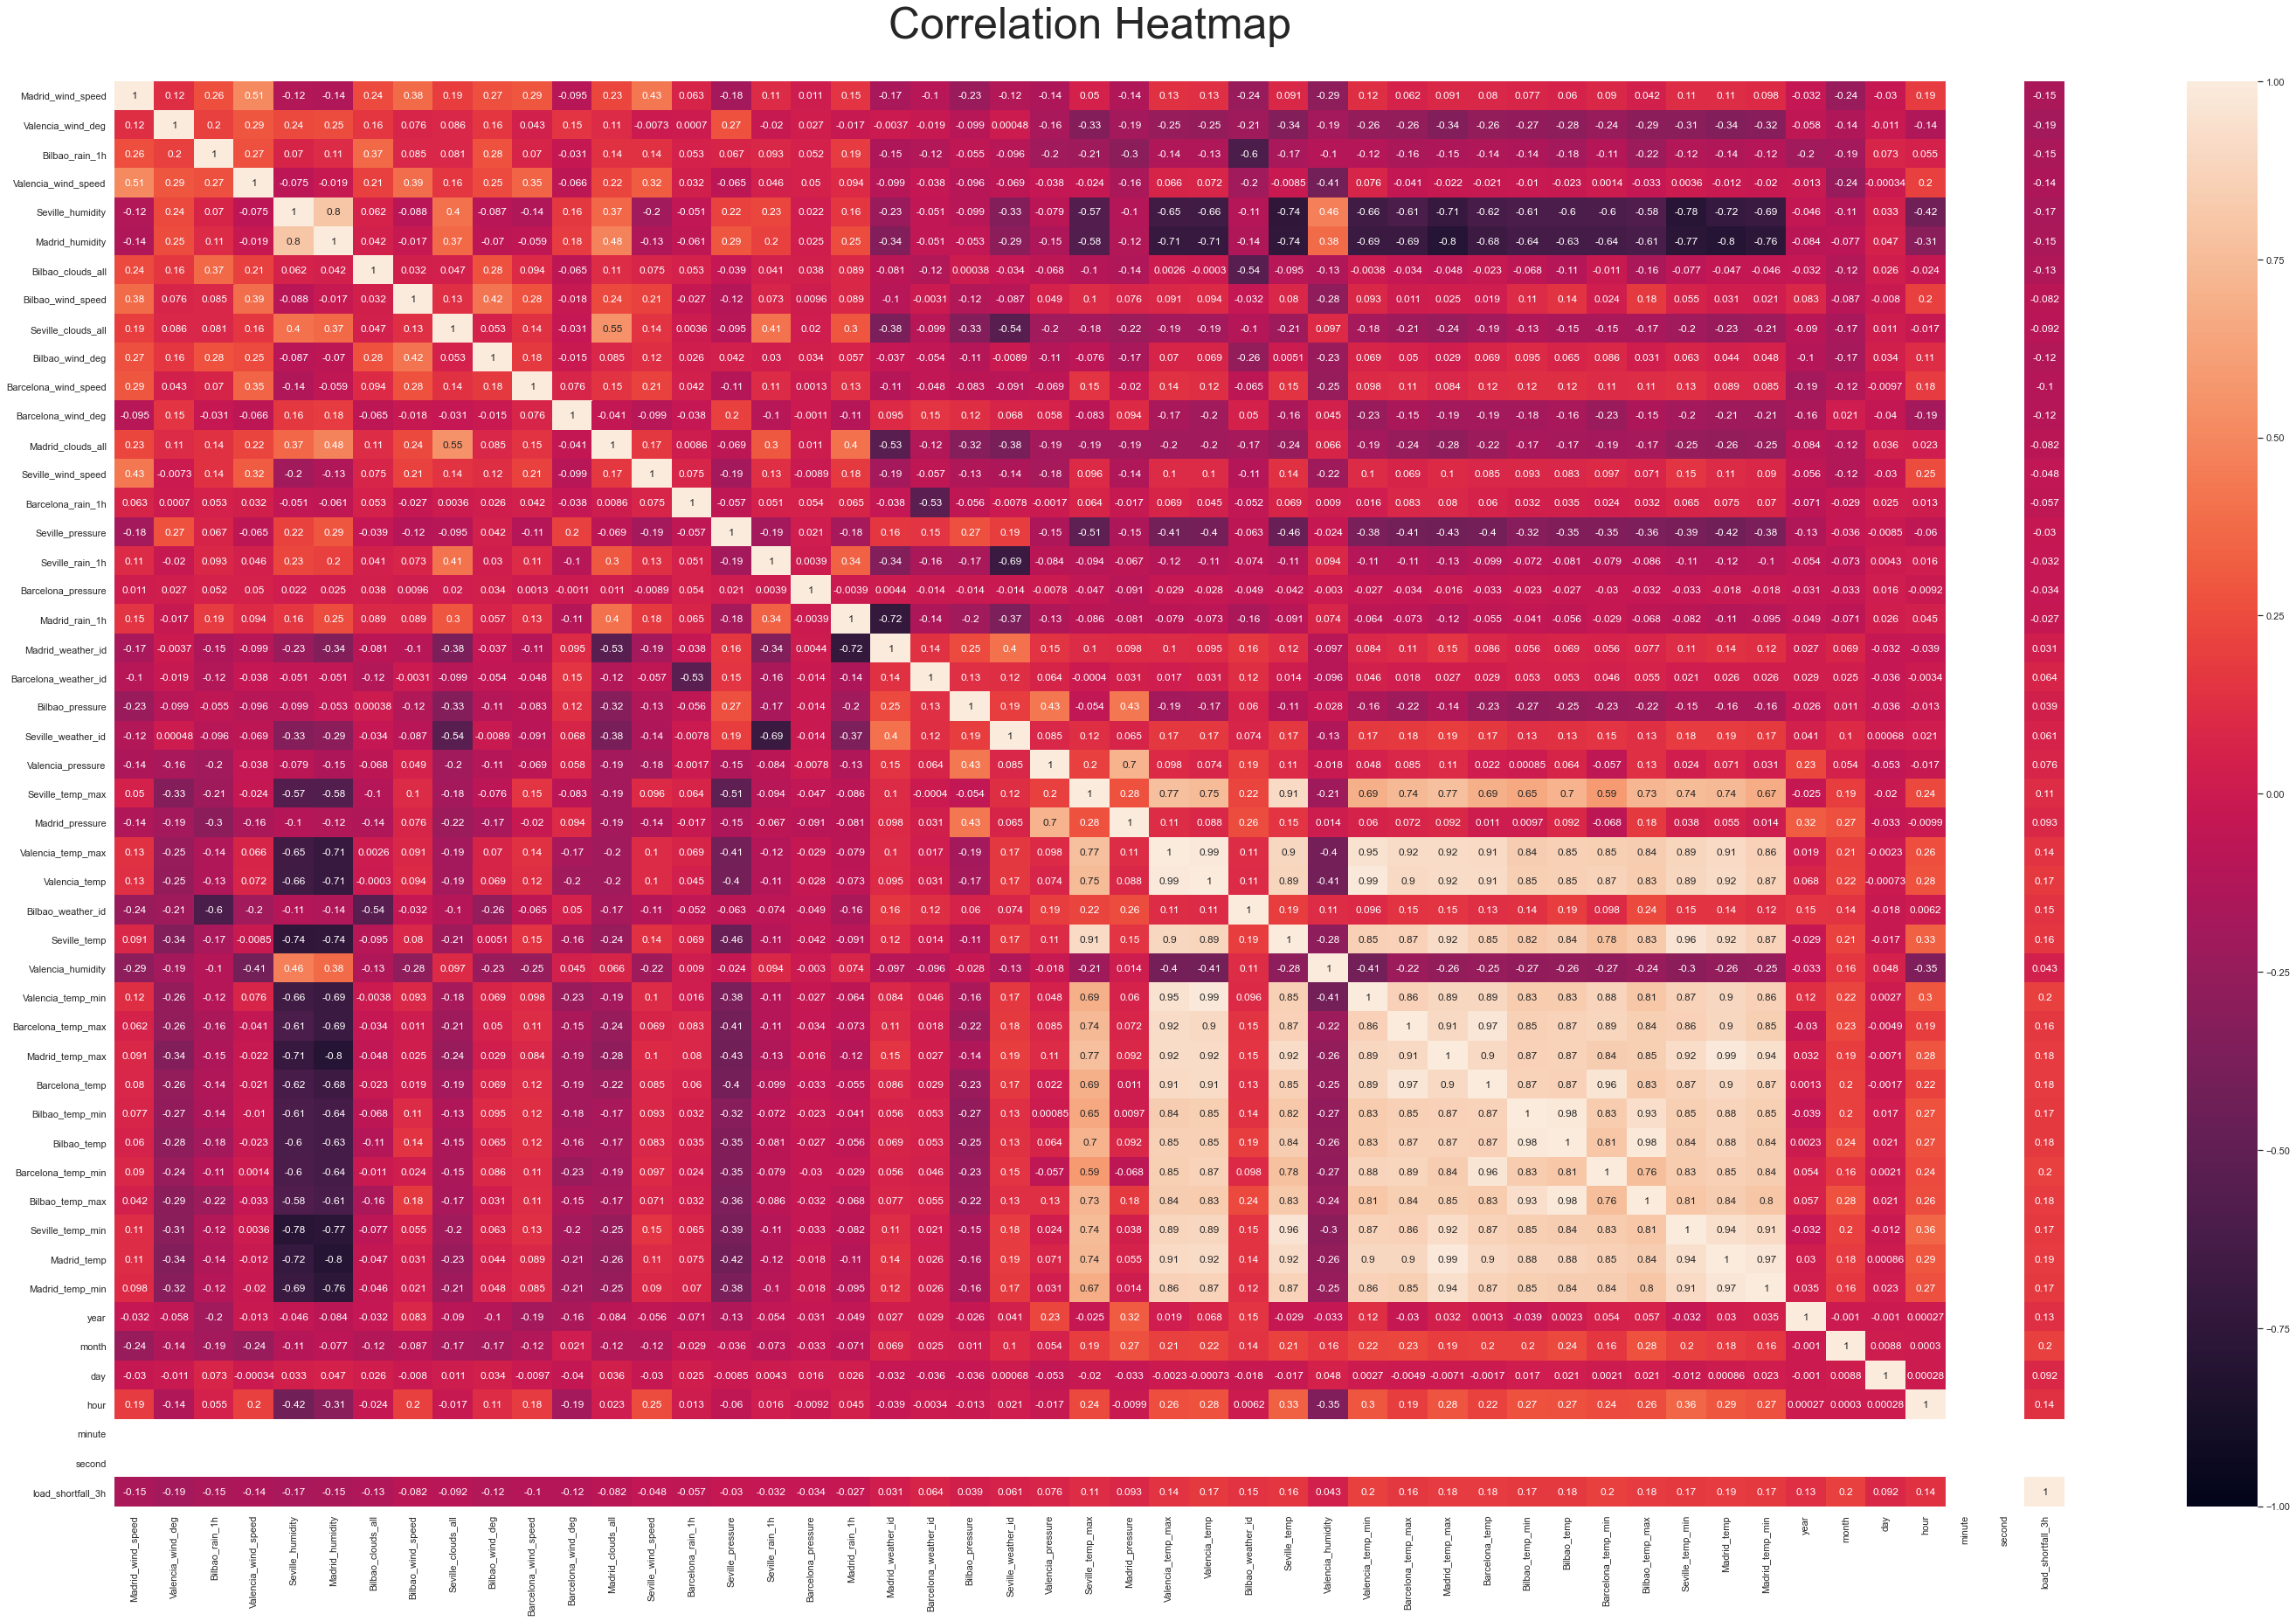

In [725]:
# engineer existing features
correlation = df2.corr()

plt.figure(figsize =(50,30))
thegraph = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
thegraph.set_title('Correlation Heatmap', fontdict={'fontsize':50}, pad=50);




In the **Heatmap** above, we observe a high number of highly correlated features, amongst the minimum and maximum temperatures.


This can be problematic because it will becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently as the independent variables will tend to change in unison. To train our model well, we blieve it is better to drop those features that highly correlated to each other.


The code below will remove one of each of the highly correlated pairs of features that are highly correlated with each other.

In [39]:
def correlations(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
            

In [40]:
corr_features = correlations(df2, 0.6)
len(set(corr_features))
print('Correlated features: ', len(set(corr_features)))
print('Correlated features are: ', corr_features)

Correlated features:  19
Correlated features are:  {'Madrid_temp', 'Madrid_temp_max', 'Valencia_temp_max', 'Bilbao_temp_min', 'Madrid_temp_min', 'Barcelona_temp_max', 'Seville_temp', 'Bilbao_weather_id', 'Barcelona_temp', 'Seville_temp_min', 'Bilbao_temp_max', 'Madrid_weather_id', 'Bilbao_temp', 'Madrid_pressure', 'Barcelona_temp_min', 'Valencia_temp', 'Seville_weather_id', 'Madrid_humidity', 'Valencia_temp_min'}


In [41]:
df2.shape

(8763, 49)

In [42]:
df2_non_corr=df2.drop(corr_features, axis=1)

In [43]:
df2_non_corr.shape

(8763, 30)

In [44]:
df2_non_corr.corr()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
Madrid_wind_speed              1.000000           0.121835        0.259719   
Valencia_wind_deg              0.121835           1.000000        0.199288   
Bilbao_rain_1h                 0.259719           0.199288        1.000000   
Valencia_wind_speed            0.513092           0.292731        0.265864   
Seville_humidity              -0.117892           0.240007        0.069878   
Bilbao_clouds_all              0.244001           0.158266        0.370733   
Bilbao_wind_speed              0.377854           0.075864        0.085398   
Seville_clouds_all             0.191251           0.085519        0.081131   
Bilbao_wind_deg                0.270950           0.157252        0.279350   
Barcelona_wind_speed           0.294640           0.042795        0.069997   
Barcelona_wind_deg            -0.095380           0.151146       -0.030723   
Madrid_clouds_all              0.230126           0.105080        0.135524   
Seville_wind_speed             0.434104          -0.007258        0.140101   
Barcelona_rain_1h              0.062758           0.000699        0.052558   
Seville_pressure              -0.182792           0.274340        0.067471   
Seville_rain_1h                0.108413          -0.019783        0.092984   
Barcelona_pressure             0.011134           0.026729        0.052458   
Madrid_rain_1h                 0.150446          -0.017304        0.187423   
Barcelona_weather_id          -0.099582          -0.018537       -0.120618   
Bilbao_pressure               -0.231747          -0.099051       -0.054814   
Valencia_pressure             -0.142737          -0.164502       -0.199341   
Seville_temp_max               0.050043          -0.328244       -0.210323   
Valencia_humidity             -0.285787          -0.192267       -0.103868   
year                          -0.031553          -0.057513       -0.200747   
month                         -0.237445          -0.140195       -0.188274   
day                           -0.029954          -0.010627        0.072752   
hour                           0.186228          -0.138415        0.054527   
minute                              NaN                NaN             NaN   
second                              NaN                NaN             NaN   
load_shortfall_3h             -0.150981          -0.188674       -0.152510   

                      Valencia_wind_speed  Seville_humidity  \
Madrid_wind_speed                0.513092         -0.117892   
Valencia_wind_deg                0.292731          0.240007   
Bilbao_rain_1h                   0.265864          0.069878   
Valencia_wind_speed              1.000000         -0.075227   
Seville_humidity                -0.075227          1.000000   
Bilbao_clouds_all                0.210524          0.061680   
Bilbao_wind_speed                0.386478         -0.088180   
Seville_clouds_all               0.163675          0.399436   
Bilbao_wind_deg                  0.248643         -0.087246   
Barcelona_wind_speed             0.347966         -0.138625   
Barcelona_wind_deg              -0.066071          0.164064   
Madrid_clouds_all                0.221887          0.366602   
Seville_wind_speed               0.316035         -0.202449   
Barcelona_rain_1h                0.031804         -0.051022   
Seville_pressure                -0.065082          0.217941   
Seville_rain_1h                  0.046085          0.227476   
Barcelona_pressure               0.050282          0.021599   
Madrid_rain_1h                   0.093865          0.164019   
Barcelona_weather_id            -0.037605         -0.050515   
Bilbao_pressure                 -0.096374         -0.099458   
Valencia_pressure               -0.038234         -0.078962   
Seville_temp_max                -0.024045         -0.566426   
Valencia_humidity               -0.413017          0.464012   
year                            -0.012650         -0.045730   
month                       

*__Correlation and Significance__*

The code below creates a new DataFrame and store the correlation coefficents and p-values in that DataFrame for reference, so we can test how significant that coefficient is.

In [47]:
corrs = df2_non_corr.corr()['load_shortfall_3h'].sort_values(ascending=False)


from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df2_non_corr[col], df2_non_corr['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

C:\Users\u1121\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Correlation_Coefficient   P_Value
month                                0.199048  0.000000
Bilbao_rain_1h                      -0.152510  0.000000
Madrid_wind_speed                   -0.150981  0.000000
Valencia_wind_speed                 -0.142791  0.000000
Bilbao_clouds_all                   -0.127293  0.000000
Bilbao_wind_deg                     -0.120800  0.000000
Barcelona_wind_deg                  -0.116133  0.000000
Barcelona_wind_speed                -0.103633  0.000000
Seville_clouds_all                  -0.091804  0.000000
Madrid_clouds_all                   -0.081623  0.000000
Bilbao_wind_speed                   -0.081602  0.000000
Barcelona_rain_1h                   -0.056633  0.000000
Seville_humidity                    -0.167290  0.000000
Valencia_wind_deg                   -0.188674  0.000000
Barcelona_weather_id                 0.063868  0.000000
Valencia_pressure                    0.076012  0.000000
day                                  0.092116  0.000000
Seville_temp_max                     0.109834  0.000000
year                                 0.131324  0.000000
hour                                 0.139285  0.000000
Seville_wind_speed                  -0.048433  0.000006
Valencia_humidity                    0.043140  0.000054
Bilbao_pressure                      0.039052  0.000256
Barcelona_pressure                  -0.034385  0.001285
Seville_rain_1h                     -0.031572  0.003118
Seville_pressure                    -0.030434  0.004383
Madrid_rain_1h                      -0.027159  0.011008

All the p values< 0,05. This indicated that the features are all significant.

### 4.4 Preparing the test dataset

In [48]:
df_test= pd.read_csv("df_test.csv")
df_test.head(2)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000              87.0        71.333333   
1             0.0             5.333333              89.0        78.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0               20.0           3.000000                 0.0       193.333333   
1                0.0           3.666667                 0.0       143.333333   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              4.000000          176.666667                0.0   
1              4.666667          266.666667                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            1.000000                0.0             sp25              0.0   
1            0.666667                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0               0         1017.333333              0.0             0.0   
1               0         1020.333333              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0                 0              800.0   
1                0.0                 0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0            800.000000      1025.666667               800.0   
1            800.333333      1026.666667               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0                NaN        284.483333      1030.000000         287.483333   
1                NaN        282.483333      1030.333333         284.150000   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     287.483333              801.0    283.673333          46.333333   
1     284.150000              721.0    281.673333          53.666667   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0         287.483333          287.816667       280.816667      287.356667   
1         284.150000          284.816667       280.483333      284.190000   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       276.150000       280.38          286.816667           285.15   
1       277.816667       281.01          283.483333           284.15   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  
0            283.15   279.866667           279.15  
1            281.15   279.193333           278.15

In [49]:
#Will be used to extract time later on
df_test1= df_test.copy(deep=True)
df_test1.head(2)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000              87.0        71.333333   
1             0.0             5.333333              89.0        78.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0               20.0           3.000000                 0.0       193.333333   
1                0.0           3.666667                 0.0       143.333333   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              4.000000          176.666667                0.0   
1              4.666667          266.666667                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            1.000000                0.0             sp25              0.0   
1            0.666667                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0               0         1017.333333              0.0             0.0   
1               0         1020.333333              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0                 0              800.0   
1                0.0                 0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0            800.000000      1025.666667               800.0   
1            800.333333      1026.666667               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0                NaN        284.483333      1030.000000         287.483333   
1                NaN        282.483333      1030.333333         284.150000   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     287.483333              801.0    283.673333          46.333333   
1     284.150000              721.0    281.673333          53.666667   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0         287.483333          287.816667       280.816667      287.356667   
1         284.150000          284.816667       280.483333      284.190000   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       276.150000       280.38          286.816667           285.15   
1       277.816667       281.01          283.483333           284.15   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  
0            283.15   279.866667           279.15  
1            281.15   279.193333           278.15

In [51]:
#convert time data
df_test['time'] = pd.to_datetime(df['time'])

df_test['year'] = df['time'].dt.year
df_test['month'] = df['time'].dt.month
df_test['day'] = df['time'].dt.day
df_test['hour'] = df['time'].dt.hour
df_test['minute'] = df['time'].dt.minute
df_test['second'] = df['time'].dt.second

In [52]:
#convert categorical data
df_test['Valencia_wind_deg']=df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])

df_test['Seville_pressure']=df_test['Seville_pressure'].str.extract('(\d+)')
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure'])

In [53]:
# remove missing values/ features

#Filling missing value with the mean
df_clean_test = df_test.fillna(value=df['Valencia_pressure'].mean())
#removing the unnamed column
df_clean_test.drop('Unnamed: 0', inplace =True, axis=1)

#dropping column that have only zero values
df_clean_test.drop(columns =['Valencia_snow_3h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h'], inplace= True)


Scaling Test Data frame

In [54]:
# split predictors and response
X1_test= df_clean_test.drop(['time'], axis=1)

In [55]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

# Create scaled version of the predictors (there is no need to scale the response)
X_scaled_test = scaler.fit_transform(X1_test)

# Convert the scaled predictor values into a dataframe
X_standardise_test = pd.DataFrame(X_scaled_test,columns=X1_test.columns)

In [56]:
# This is the non correlatated test data

X_non_corr_test=X_standardise_test.drop(corr_features, axis=1)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will create one or more regression models that are able to accurately predict the thee hour load shortfall. 

These are the models that will created:

- Fitting linear regression model using Sklearn and using OLS
- Fitting linear regression model on dataset that has removed the correlated features
- Fitting a regularized linear regression model

### 5.1 Fitting   linear regression models using Sklearn and OLS

We will first fit the cleaned data using Sklearn and OLS


__(i). *Sklearn*__

In [57]:
# split predictors and response
X = df2.drop(['load_shortfall_3h'], axis=1)
y = df2['load_shortfall_3h']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   float64
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [58]:
# create model object
lm = LinearRegression()

In [59]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [60]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [61]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [62]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [63]:
print("Intercept:", beta_0)



Intercept: 10672.066713664823


In [64]:
beta_js

Coefficient
Madrid_wind_speed     -405.922977
Valencia_wind_deg     -246.270072
Bilbao_rain_1h        -190.046337
Valencia_wind_speed   -189.764139
Seville_humidity      -671.839120
Madrid_humidity       -133.475061
Bilbao_clouds_all     -172.439114
Bilbao_wind_speed     -127.976592
Seville_clouds_all      44.513251
Bilbao_wind_deg       -212.386851
Barcelona_wind_speed  -167.658542
Barcelona_wind_deg    -226.441385
Madrid_clouds_all      208.670006
Seville_wind_speed     -56.315221
Barcelona_rain_1h     -133.833833
Seville_pressure       367.206972
Seville_rain_1h        112.964877
Barcelona_pressure     -79.554505
Madrid_rain_1h          77.610652
Madrid_weather_id      -53.185673
Barcelona_weather_id    90.597854
Bilbao_pressure        -95.921035
Seville_weather_id      53.139412
Valencia_pressure      341.033863
Seville_temp_max     -1358.404876
Madrid_pressure         36.019530
Valencia_temp_max    -1231.786133
Valencia_temp        -1928.455770
Bilbao_weather_id      116.800299
Seville_temp          3223.227071
Valencia_humidity      285.224726
Valencia_temp_min     3133.609939
Barcelona_temp_max    -672.209717
Madrid_temp_max      -2592.383724
Barcelona_temp        2769.605240
Bilbao_temp_min       4467.589733
Bilbao_temp          -8238.427939
Barcelona_temp_min    -940.527571
Bilbao_temp_max       3593.708493
Seville_temp_min     -3172.195325
Madrid_temp           5213.672731
Madrid_temp_min      -2192.593081
year                   197.898160
month                  541.291206
day                    505.330337
hour                   643.962184
minute                   0.000000
second                   0.000000

__*Predictive accuracy*__

In [65]:
# Import metrics module
from sklearn import metrics

In [66]:
train_pred = lm.predict(X_train)

test_pred = lm.predict(X_test)

In [67]:
print('Train MSE:', round(metrics.mean_squared_error(y_train, train_pred)))

Train MSE: 22483819


In [68]:
print('Test MSE:', round(metrics.mean_squared_error(y_test, test_pred)))

Test MSE: 22040429


In [102]:
print("RMSE: ",round( np.sqrt(metrics.mean_squared_error(y_test,test_pred))))

RMSE:  4695


__*Kaggle*__

Predictions on test

In [70]:
preds=lm.predict(X_standardise_test)

In [71]:
daf=pd.DataFrame(preds,columns=['load_shortfall_3h'])
daf.head()

load_shortfall_3h
0        7297.372420
1        6903.206765
2        8347.439873
3        8349.800028
4        7697.319439

In [72]:
output=pd.DataFrame({'time':df_test1['time']})
submission=output.join(daf)
#submission.to_csv('submission.csv',index=False)

submission

time  load_shortfall_3h
0     2018-01-01 00:00:00        7297.372420
1     2018-01-01 03:00:00        6903.206765
2     2018-01-01 06:00:00        8347.439873
3     2018-01-01 09:00:00        8349.800028
4     2018-01-01 12:00:00        7697.319439
...                   ...                ...
2915  2018-12-31 09:00:00       10962.170020
2916  2018-12-31 12:00:00       12561.871905
2917  2018-12-31 15:00:00       14177.318465
2918  2018-12-31 18:00:00       14359.781914
2919  2018-12-31 21:00:00       13460.329212

[2920 rows x 2 columns]

 
 
 __*(ii). Fitting a Linear regression model using statmodels.OLS*__


In [73]:
import statsmodels.formula.api as sm

In [74]:
df2.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   
2          -0.770554           1.294054       -0.362123            -0.657917   
3          -0.770554           0.946527       -0.362123            -0.657917   
4          -0.770554           0.599000       -0.362123            -0.657917   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   
2          0.383491         0.284319          -1.335491          -0.501451   
3          0.118238        -0.044439          -1.335491          -0.501451   
4         -0.161751        -0.017043          -1.274045          -0.894581   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0           -0.565065         0.630823              1.932284   
1           -0.565065         0.607959              0.630270   
2           -0.565065         0.542632             -0.485743   
3           -0.565065         0.398912             -0.299741   
4           -0.565065         0.255192              0.816272   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           -1.660205          -0.694188            0.542975   
1           -0.578686          -0.694188            0.542975   
2            1.520733          -0.694188            0.144442   
3            0.925711          -0.694188            0.941509   
4            0.779762          -0.694188            0.343708   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Barcelona_pressure  \
0          -0.203099          1.588087        -0.224278           -0.024277   
1          -0.203099          1.588087        -0.224278           -0.024206   
2          -0.203099          1.588087        -0.224278           -0.024158   
3          -0.203099          1.588087        -0.224278           -0.024229   
4          -0.203099          1.588087        -0.224278           -0.024372   

   Madrid_rain_1h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0       -0.247776           0.342424              0.385993         1.718219   
1       -0.247776           0.342424              0.385993         1.784583   
2       -0.247776           0.342424              0.385993         1.817765   
3       -0.247776           0.342424              0.385993         1.817765   
4       -0.247776           0.342424              0.385993         1.751401   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0            0.352274      -1.129531e+00         -2.616796        -1.756232   
1            0.352274      -9.289340e-01         -2.539014        -1.696165   
2            0.352274      -8.085757e-01         -2.105564        -1.636097   
3            0.352274      -3.672620e-01         -1.361703        -0.705052   
4            0.352274       2.736630e-13         -1.348214         1.127003   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0          -2.835227      -2.890888           0.649842     -2.490266   
1          -2.591966      -2.633926           0.649842     -2.403108   
2          -1.761812      -1.757012           0.649842     -1.917409   
3          -0.850953      -0.794849           0.649842     -1.083879   
4          -1.100044      -1.057970           0.649842     -1.068764   

   Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  \
0           0.540928          -2.892663           -1.394813        -2.420380   
1           0.298645          -2.626219           -1.456868        -2.374370   
2           0.021750          -1.716949           -1.316350        -1.726058   
3          -0.583957          -0.719283           -1.061929        -0.783992   
4          -0.358980     

In [75]:
df3 = df2.copy(deep=True)
df3.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   
2          -0.770554           1.294054       -0.362123            -0.657917   
3          -0.770554           0.946527       -0.362123            -0.657917   
4          -0.770554           0.599000       -0.362123            -0.657917   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   
2          0.383491         0.284319          -1.335491          -0.501451   
3          0.118238        -0.044439          -1.335491          -0.501451   
4         -0.161751        -0.017043          -1.274045          -0.894581   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0           -0.565065         0.630823              1.932284   
1           -0.565065         0.607959              0.630270   
2           -0.565065         0.542632             -0.485743   
3           -0.565065         0.398912             -0.299741   
4           -0.565065         0.255192              0.816272   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           -1.660205          -0.694188            0.542975   
1           -0.578686          -0.694188            0.542975   
2            1.520733          -0.694188            0.144442   
3            0.925711          -0.694188            0.941509   
4            0.779762          -0.694188            0.343708   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Barcelona_pressure  \
0          -0.203099          1.588087        -0.224278           -0.024277   
1          -0.203099          1.588087        -0.224278           -0.024206   
2          -0.203099          1.588087        -0.224278           -0.024158   
3          -0.203099          1.588087        -0.224278           -0.024229   
4          -0.203099          1.588087        -0.224278           -0.024372   

   Madrid_rain_1h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0       -0.247776           0.342424              0.385993         1.718219   
1       -0.247776           0.342424              0.385993         1.784583   
2       -0.247776           0.342424              0.385993         1.817765   
3       -0.247776           0.342424              0.385993         1.817765   
4       -0.247776           0.342424              0.385993         1.751401   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0            0.352274      -1.129531e+00         -2.616796        -1.756232   
1            0.352274      -9.289340e-01         -2.539014        -1.696165   
2            0.352274      -8.085757e-01         -2.105564        -1.636097   
3            0.352274      -3.672620e-01         -1.361703        -0.705052   
4            0.352274       2.736630e-13         -1.348214         1.127003   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0          -2.835227      -2.890888           0.649842     -2.490266   
1          -2.591966      -2.633926           0.649842     -2.403108   
2          -1.761812      -1.757012           0.649842     -1.917409   
3          -0.850953      -0.794849           0.649842     -1.083879   
4          -1.100044      -1.057970           0.649842     -1.068764   

   Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  \
0           0.540928          -2.892663           -1.394813        -2.420380   
1           0.298645          -2.626219           -1.456868        -2.374370   
2           0.021750          -1.716949           -1.316350        -1.726058   
3          -0.583957          -0.719283           -1.061929        -0.783992   
4          -0.358980     

In [76]:
formula_str = df3.columns[-1] +' ~ '+'+'.join(df3.drop(['load_shortfall_3h'], axis=1).columns[:-1]);formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Valencia_wind_deg+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Seville_clouds_all+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Madrid_clouds_all+Seville_wind_speed+Barcelona_rain_1h+Seville_pressure+Seville_rain_1h+Barcelona_pressure+Madrid_rain_1h+Madrid_weather_id+Barcelona_weather_id+Bilbao_pressure+Seville_weather_id+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Valencia_temp+Bilbao_weather_id+Seville_temp+Valencia_humidity+Valencia_temp_min+Barcelona_temp_max+Madrid_temp_max+Barcelona_temp+Bilbao_temp_min+Bilbao_temp+Barcelona_temp_min+Bilbao_temp_max+Seville_temp_min+Madrid_temp+Madrid_temp_min+year+month+day+hour+minute'

*__construct and fit the model__*

In [77]:
model=sm.ols(formula=formula_str, data=df3)

In [78]:
fitted = model.fit()

__Print model summary__

In [79]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     41.10
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:37:34   Log-Likelihood:                -86584.
No. Observations:                8763   AIC:                         1.733e+05
Df Residuals:                    8716   BIC:                         1.736e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.067e+04 

### 5.2 fitting a model on the non-correlated dataset

We can also fit a model on the datatset df2_non_corr In this dataset variables have been selected based on their correlation and multicollineary.

__(i). using ols__

In [84]:
df4 =df2_non_corr.copy(deep=True)

In [85]:
formula_str = df4.columns[-1] +' ~ '+'+'.join(df4.drop(['load_shortfall_3h'], axis=1).columns[:-1]);formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Valencia_wind_deg+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Seville_clouds_all+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Madrid_clouds_all+Seville_wind_speed+Barcelona_rain_1h+Seville_pressure+Seville_rain_1h+Barcelona_pressure+Madrid_rain_1h+Barcelona_weather_id+Bilbao_pressure+Valencia_pressure+Seville_temp_max+Valencia_humidity+year+month+day+hour+minute'

In [86]:
fitted = model.fit()

In [87]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     41.10
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:51:46   Log-Likelihood:                -86584.
No. Observations:                8763   AIC:                         1.733e+05
Df Residuals:                    8716   BIC:                         1.736e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.067e+04 

In [88]:
#mse of residuals
fitted.mse_resid

22492634.93578825

In [89]:
#rmse of residuals
np.sqrt(fitted.mse_resid)

4742.640080776555

In [90]:
#total mse
fitted.mse_total

27228008.274591047

*__Checking for independence__*

Sklearn is limited in terms of metrics and tools available to evaluate the appropriateness of the regression models we fit. 
With the statsmodels library there has a more broas set of statistical tools to help us, which enable us to expand our analysis.

IndexError: index 10 is out of bounds for axis 0 with size 10

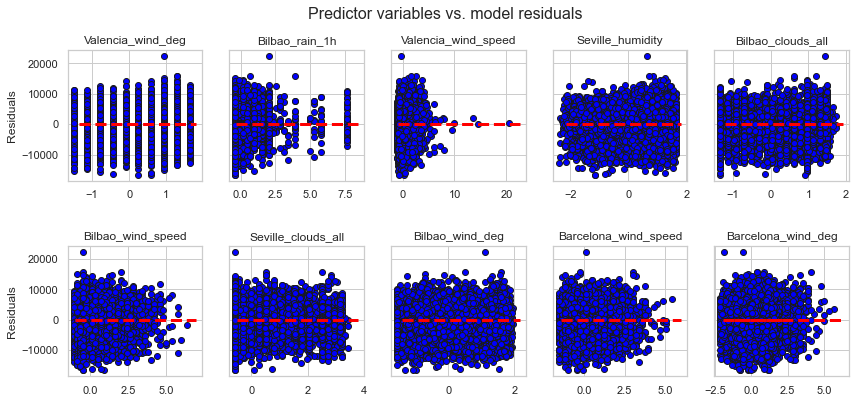

In [91]:
# checking for independence
fig, axs = plt.subplots(2,5, figsize=(14,6),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(df4.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=df4[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(df4[column])
    xmax = max(df4[column])
    axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')


there is obvious clustering in most of the predictor variables which i a clear indication of high dependency

__Checking for normality__

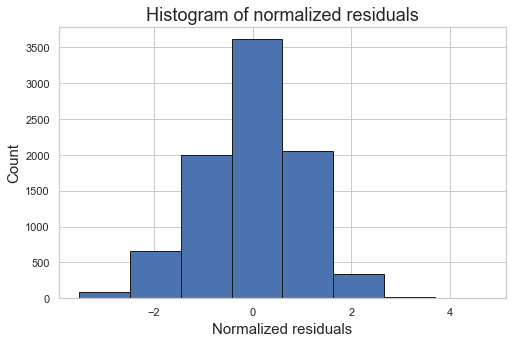

In [92]:
#histogram of normalized residuals
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

the normalized residuals are approximately normal

*__QQ plots of the residuals__*

In [93]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

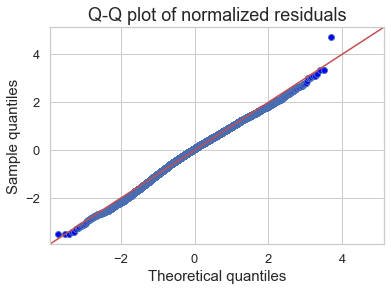

In [94]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

judging only from the two checks above, the residuals do appear to be normally distributed.

__(ii) using sklearn__

In [95]:
X = df4.drop(['load_shortfall_3h'], axis=1)
y = df4['load_shortfall_3h']

In [96]:
lm = LinearRegression()

In [97]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [98]:
lm.fit(X_train, y_train)

LinearRegression()

In [101]:
#predictive accuracy
y_pred = lm.predict(X_test)
print("RMSE: ",round(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE:  4790


| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4695|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4790|
 
 
 From the table above we can see that the linear regression with all the features has better predictive accuracy
 

### 5.3 Fitting a  regularized linear regression model

Regularisation offers an alternative method to the variable selection selection performed above. With regularisation the intention to scale each feature by how much it affects. There is a penality on those individual coefficients that get too large (those that contribute the most to reducing the fit).


We will now offer an alternative model. Where there is no descrete variable selection as above but a model that is achieved through ridge regression

#### Ridge Regression

In [103]:
df_ridge=df2.copy(deep=True)

In [104]:
df_ridge.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   
2          -0.770554           1.294054       -0.362123            -0.657917   
3          -0.770554           0.946527       -0.362123            -0.657917   
4          -0.770554           0.599000       -0.362123            -0.657917   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   
2          0.383491         0.284319          -1.335491          -0.501451   
3          0.118238        -0.044439          -1.335491          -0.501451   
4         -0.161751        -0.017043          -1.274045          -0.894581   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0           -0.565065         0.630823              1.932284   
1           -0.565065         0.607959              0.630270   
2           -0.565065         0.542632             -0.485743   
3           -0.565065         0.398912             -0.299741   
4           -0.565065         0.255192              0.816272   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           -1.660205          -0.694188            0.542975   
1           -0.578686          -0.694188            0.542975   
2            1.520733          -0.694188            0.144442   
3            0.925711          -0.694188            0.941509   
4            0.779762          -0.694188            0.343708   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Barcelona_pressure  \
0          -0.203099          1.588087        -0.224278           -0.024277   
1          -0.203099          1.588087        -0.224278           -0.024206   
2          -0.203099          1.588087        -0.224278           -0.024158   
3          -0.203099          1.588087        -0.224278           -0.024229   
4          -0.203099          1.588087        -0.224278           -0.024372   

   Madrid_rain_1h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0       -0.247776           0.342424              0.385993         1.718219   
1       -0.247776           0.342424              0.385993         1.784583   
2       -0.247776           0.342424              0.385993         1.817765   
3       -0.247776           0.342424              0.385993         1.817765   
4       -0.247776           0.342424              0.385993         1.751401   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0            0.352274      -1.129531e+00         -2.616796        -1.756232   
1            0.352274      -9.289340e-01         -2.539014        -1.696165   
2            0.352274      -8.085757e-01         -2.105564        -1.636097   
3            0.352274      -3.672620e-01         -1.361703        -0.705052   
4            0.352274       2.736630e-13         -1.348214         1.127003   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0          -2.835227      -2.890888           0.649842     -2.490266   
1          -2.591966      -2.633926           0.649842     -2.403108   
2          -1.761812      -1.757012           0.649842     -1.917409   
3          -0.850953      -0.794849           0.649842     -1.083879   
4          -1.100044      -1.057970           0.649842     -1.068764   

   Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  \
0           0.540928          -2.892663           -1.394813        -2.420380   
1           0.298645          -2.626219           -1.456868        -2.374370   
2           0.021750          -1.716949           -1.316350        -1.726058   
3          -0.583957          -0.719283           -1.061929        -0.783992   
4          -0.358980     

In [105]:
X = df_ridge.drop(['load_shortfall_3h'], axis=1)
y = df_ridge['load_shortfall_3h']

In [106]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [107]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [110]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [111]:
# Create ridge model
ridge = Ridge(alpha=10)

In [112]:
# Train the model
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [113]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [114]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [115]:
print("Intercept:", float(b0))

Intercept: 10424.445940130723


In [116]:
# Check out the coefficients
coeff

Coefficient
Madrid_wind_speed     -381.687783
Valencia_wind_deg     -153.391386
Bilbao_rain_1h        -211.732895
Valencia_wind_speed   -102.536909
Seville_humidity      -769.821892
Madrid_humidity       -207.247587
Bilbao_clouds_all     -130.854949
Bilbao_wind_speed      -43.610698
Seville_clouds_all     116.878378
Bilbao_wind_deg       -365.779001
Barcelona_wind_speed  -177.697792
Barcelona_wind_deg    -188.595030
Madrid_clouds_all      300.768710
Seville_wind_speed     -14.215562
Barcelona_rain_1h     -116.887290
Seville_pressure       591.190618
Seville_rain_1h        165.482606
Barcelona_pressure     -83.326186
Madrid_rain_1h          82.651005
Madrid_weather_id        5.767088
Barcelona_weather_id    78.173107
Bilbao_pressure       -184.888248
Seville_weather_id      59.583260
Valencia_pressure      305.486489
Seville_temp_max      -263.684165
Madrid_pressure         90.656969
Valencia_temp_max    -1418.264049
Valencia_temp         -763.616626
Bilbao_weather_id       99.127344
Seville_temp          1126.770188
Valencia_humidity      703.581068
Valencia_temp_min     2560.308023
Barcelona_temp_max    -389.209706
Madrid_temp_max      -2242.481860
Barcelona_temp        1709.508997
Bilbao_temp_min       1644.750595
Bilbao_temp          -3179.958447
Barcelona_temp_min    -452.792567
Bilbao_temp_max       1440.165384
Seville_temp_min     -1823.444502
Madrid_temp           3899.864776
Madrid_temp_min      -1534.972228
year                   -77.870133
month                  313.440431
day                    330.142397
hour                   638.000264
minute                   0.000000
second                   0.000000

__*Predictive accuracy of the  model*__ 

In [123]:
# Import metrics module
from sklearn import metrics

In [124]:
train_ridge = ridge.predict(X_train)

In [125]:
print('Ridge Train MSE:', round(metrics.mean_squared_error(y_train, train_ridge)))

Ridge Train MSE: 22673223


In [126]:
test_ridge = ridge.predict(X_test)

In [127]:
print('Ridge train MS :', round(metrics.mean_squared_error(y_test, test_ridge)))

Ridge train MS : 23200086


In [129]:
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test,test_ridge))))

RMSE:  4817


| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4695|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4790|
 |2. Ridge regression | 4817|
 
 The model with the best prdictive accuracy is still the linear regression with all the features.
 

### 5.4. Building a Random Forest Regression Model

In [131]:
df5 =df2.copy(deep=True)

In [132]:
X = df5.drop(['load_shortfall_3h'], axis=1)
y = df5['load_shortfall_3h']
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Train test split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [135]:
#fitting decision tree
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=10)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=10)

In [136]:
#testing
from sklearn.metrics import mean_squared_error
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3368.934812036475


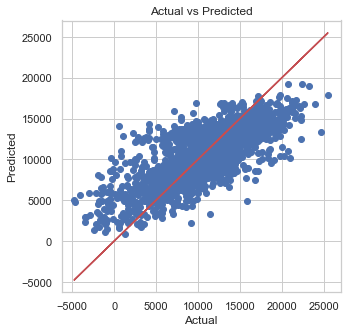

In [137]:
#fit actual vs expected
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()


__Tuning model hyperparameters__

In [138]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=10, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=23)

In [139]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=2, random_state=23)

In [140]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=23)

In [141]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=23)

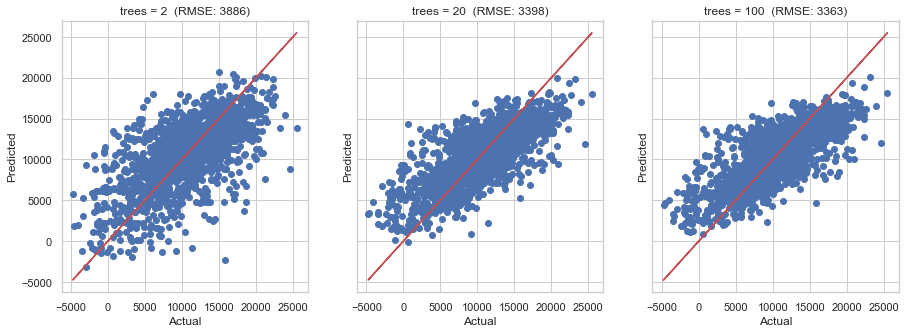

In [142]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

Looking at the RMSEs, the forest with 100 trees performed the best. This is our best performing model thus far.

| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4695|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4790|
 |3. Ridge regression | 4817|
 |4. Random Forest | 3363|
 
 The random forest model is has the best predictive accuracy.

In [147]:
#Predict on test dataframe
y_pred_test_RF = RF.predict(X_standardise_test)

In [145]:
daf2=pd.DataFrame(y_pred_test_RF,columns=['load_shortfall_3h'])
daf2

load_shortfall_3h
0           3010.883289
1           2486.821556
2           4519.075134
3           4820.257698
4           5745.126102
...                 ...
2915        9466.992976
2916        7792.988235
2917        9553.657766
2918        9229.015528
2919        8652.929061

[2920 rows x 1 columns]

In [146]:
output2=pd.DataFrame({'time':df_test1['time']})
submission_RF=output2.join(daf2)
#submission_RF.to_csv('submission_RF.csv',index=False)

submission_RF

time  load_shortfall_3h
0     2018-01-01 00:00:00        3010.883289
1     2018-01-01 03:00:00        2486.821556
2     2018-01-01 06:00:00        4519.075134
3     2018-01-01 09:00:00        4820.257698
4     2018-01-01 12:00:00        5745.126102
...                   ...                ...
2915  2018-12-31 09:00:00        9466.992976
2916  2018-12-31 12:00:00        7792.988235
2917  2018-12-31 15:00:00        9553.657766
2918  2018-12-31 18:00:00        9229.015528
2919  2018-12-31 21:00:00        8652.929061

[2920 rows x 2 columns]

### 5.5. Fit a decision tree model

In [148]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=10)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [151]:
# Get predictions
y_pred = DT.predict(x_test)
# Compute RMSE
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE: 3925


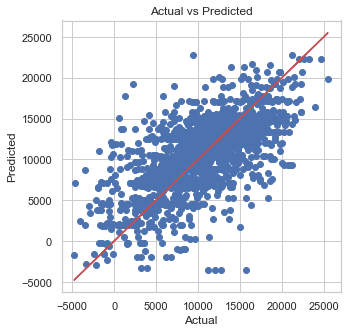

In [150]:
# Gfit actual vs expected
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()


| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4695|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4790|
 |3. Ridge regression | 4817|
 |4. Random Forest | 3363|
 |5. Decision tree | 3925|
 
 The random forest model is has the best predictive accuracy.

In [814]:
#Predict test responde variable
y_pred3 = DT.predict(X_standardise_test)

daf3=pd.DataFrame(y_pred3,columns=['load_shortfall_3h'])


output3=pd.DataFrame({'time':df_test1['time']})
submission_DT=output3.join(daf3)
#submission_DT.to_csv('submission_DT.csv',index=False)

submission_DT

time  load_shortfall_3h
0     2018-01-01 00:00:00        -441.833333
1     2018-01-01 03:00:00        -441.833333
2     2018-01-01 06:00:00       -1208.208333
3     2018-01-01 09:00:00       -1208.208333
4     2018-01-01 12:00:00       -1208.208333
...                   ...                ...
2915  2018-12-31 09:00:00       14071.666667
2916  2018-12-31 12:00:00       10017.000000
2917  2018-12-31 15:00:00        6347.333333
2918  2018-12-31 18:00:00       10017.000000
2919  2018-12-31 21:00:00        9514.666667

[2920 rows x 2 columns]

### 5.6. Support Vector Regressor

In [159]:
from sklearn.svm import SVR

In [186]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma=0.1, C=0.001)

In [187]:
sv_reg.fit(x_train,y_train)

SVR(C=0.001, gamma=0.1)

In [189]:
y_pred = sv_reg.predict(x_test)
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE:  5128


| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4695|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4790|
 |3. Ridge regression | 4817|
 |4. Random Forest | 3363|
 |5. Decision tree | 3925|
 |6. Support Vector Regressor | 5128|
 
 The random forest model has the best predictive accuracy.

### 5.7.  Heterogeneous Ensembles  

In [193]:
# Instantiate a voting ensemble usinG sklearn's VotingRegressor class
from sklearn.ensemble import VotingRegressor

In [195]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("rf",forest_3),("DT",DT),("lin modole",lm)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.5,0.4,0.1])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

At this point, we have built a voting-based ensemble that combines:

50% of Random Forest output,
40% of Decision Tree output and
10% of linear regression output

In [196]:
#making the final prediction
v_reg.fit(x_train,y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=10,
                                                   random_state=23)),
                            ('DT', DecisionTreeRegressor(max_depth=10)),
                            ('lin modole', LinearRegression())],
                weights=array([0.5, 0.4, 0.1]))

In [198]:
#Let's check the performance of the voting ensemble.
y_pred = v_reg.predict(x_test)
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test,y_pred))))


RMSE:  3401


| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4695|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4790|
 |3. Ridge regression | 4817|
 |4. Random Forest | 3363|
 |5. Decision tree | 3925|
 |6. Support Vector Regressor | 5128|
 |7. Heterogeneous Ensembles | 3401|
 
 The random forest model has the best predictive accuracy.

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


We were able to fit 7 different models to our data. We will evaluate each models peformance using the Root Mean Square Error (RMSE). This is a measure of how the avarage error for each model. Below is a table that summarizes each model.



| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4695|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4790|
 |3. Ridge regression | 4817|
 |4. Random Forest | 3363|
 |5. Decision tree | 3925|
 |6. Support Vector Regressor | 5128|
 |7. Heterogeneous Ensembles | 3401|


The model that had the best performance accuracy was the Random Forest model. On average the error for predicting the correct three hourly shortfalls is 3363.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



In this section, we will discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings.



To understand random forests, a  person must understand decisions trees.




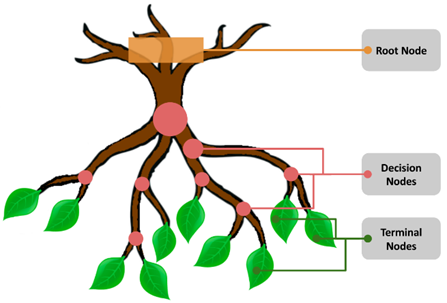





- Decision trees are constructed using two kinds of elements: nodes and branches as can be seen in the image. 
- At each node data is partitioned  into two different sections based on questions asked of one input variable (independent variable) in the data.
- This is done in order to make a prediction or to further ask questions about that input variable

For example:

- Is the minimum temperature in Barcelona greater than or equal to 25 if yes than 3 hour load shortfall is 3000.
- If it is not, another question will be asked like, is it greater than 30 if yes than 3 hour load shortfall is 2000.
- This is done until we reach a terminal node.


- A random forest combines many decision trees into a single model. 
- The problem with decision trees is that this model learns the data too closely and as a result, the model is useful in reference only to its initial data set and not to any other data sets.
- The predictions made by decision trees may not be accurate but combined together, the predictions will be closer to the mark on average.


In our random forest model we used 100 trees with 10 nodes. On average we were the actual prediction by 3363.